## RESIDENTIAL SECTOR ENERGY CONSUMPTION FORECASTING 

### Loading the Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.layers import TimeDistributed, Flatten
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, Flatten
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.layers import TimeDistributed, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, TimeDistributed
from statsmodels.tsa.arima.model import ARIMA
from keras.layers import Input
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

### Read the dataset

In [2]:
Residential_New = pd.read_excel('use_tot_sector.xlsx',sheet_name='Residential Sector', header=1, index_col=0)

In [3]:
# Reset column names to the first row (State/Year) and skip the last row (US)
Residential_New.columns = Residential_New.iloc[0]
Residential = Residential_New[1:-1]
print(Residential)

State    1960    1961    1962    1963    1964    1965    1966    1967    1968  \
AK      10189   10787   11546   12335   14082   15020   16611   17607   19393   
AL     124894  121253  132329  140993  148042  147307  153849  155314  187648   
AR      80587   80624   82565   85776   93756   90025  110858  113653  124499   
AZ      48824   51198   48300   52660   60457   58339   63080   66568   72096   
CA     595971  619172  677892  711654  792464  841483  870428  932522  948310   
CO      92060   97088  100221   92335  106220  107148  123088  123703  136344   
CT     157365  158725  158566  159556  152440  160492  159047  165908  176332   
DC      24272   24123   25044   25394   25872   26781   27190   29431   31325   
DE      25439   24991   27408   29833   28327   29678   31441   32524   35342   
FL     129053  137145  150443  167376  179779  186904  210892  218800  256943   
GA     162882  162296  168426  176197  187870  190611  207099  214257  234024   
HI       7144    7337    773

### Load the states abbrevations and divide the years to 6 decades.

In [11]:
# state abbreviation dictionary
state_dict = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

# Select the columns for both time periods
Residential_1960_1970 = Residential.loc[:, '1960':'1970']
Residential_1970_1980 = Residential.loc[:, '1971':'1980']
Residential_1980_1990 = Residential.loc[:, '1981':'1990']
Residential_1990_2000 = Residential.loc[:, '1991':'2000']
Residential_2000_2010 = Residential.loc[:, '2001':'2010']
Residential_2010_2020 = Residential.loc[:, '2011':'2020']

# Calculate the average for each state over the specified years
average_1960_1970 = Residential_1960_1970.mean(axis=1)
average_1970_1980 = Residential_1970_1980.mean(axis=1)
average_1980_1990 = Residential_1980_1990.mean(axis=1)
average_1990_2000 = Residential_1990_2000.mean(axis=1)
average_2000_2010 = Residential_2000_2010.mean(axis=1)
average_2010_2020 = Residential_2010_2020.mean(axis=1)


### Print all states with its average for every 10 years

In [6]:
# Iterate through each time interval
time_intervals = [average_1960_1970, average_1970_1980, average_1980_1990, average_1990_2000, average_2000_2010, average_2010_2020]

for i, average_values in enumerate(time_intervals):
    states = []  # List to store full state names
    state_values = []  # List to store state values

    for state in average_values.index:
        # Check if the state abbreviation exists in the dictionary
        if state in state_dict:
            full_state_name = state_dict[state]
            state_value = average_values[state]
            states.append(full_state_name)
            state_values.append(state_value)

    print(f"\nStates from {1960 + i * 10} to {1970 + i * 10}:")
    for j, state in enumerate(states):
        # Round the state value to a specific number of decimal places 
        rounded_value = round(state_values[j], 2)
        print(f"State: {state} - Value: {rounded_value}")


States from 1960 to 1970:
State: Alaska - Value: 15829.64
State: Alabama - Value: 158135.45
State: Arkansas - Value: 103892.09
State: Arizona - Value: 62940.73
State: California - Value: 824796.27
State: Colorado - Value: 115141.09
State: Connecticut - Value: 166953.27
State: District of Columbia - Value: 27799.27
State: Delaware - Value: 30877.73
State: Florida - Value: 206691.18
State: Georgia - Value: 202344.18
State: Hawaii - Value: 10413.27
State: Iowa - Value: 184750.45
State: Idaho - Value: 42022.82
State: Illinois - Value: 708800.09
State: Indiana - Value: 336567.82
State: Kansas - Value: 148629.18
State: Kentucky - Value: 157459.73
State: Louisiana - Value: 149074.18
State: Massachusetts - Value: 378685.55
State: Maryland - Value: 183205.18
State: Maine - Value: 72168.18
State: Michigan - Value: 579602.09
State: Minnesota - Value: 240322.45
State: Missouri - Value: 264870.45
State: Mississippi - Value: 104872.73
State: Montana - Value: 41969.64
State: North Carolina - Value: 

### Average for 1960 to 1970 and dividing it into 5 clusters

In [7]:
# Combine the average values for 1960-1970
average_values = pd.concat([average_1960_1970], axis=--1)
average_values.columns = ['1960-1970']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1960-1970')

# Round off the values to 2 decimal places 
average_values['1960-1970'] = average_values['1960-1970'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1960-1970'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='1960-1970')  
    cluster_min = cluster_states['1960-1970'].min()
    cluster_max = cluster_states['1960-1970'].max()
    for state, value in zip(cluster_states.index, cluster_states['1960-1970']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Residential_1960_1970.csv', index=True)



States in Cluster 0:
State: HI - Value: 10413.27
State: AK - Value: 15829.64
State: WY - Value: 20384.27
State: NV - Value: 24466.64
State: DC - Value: 27799.27
State: DE - Value: 30877.73
State: ND - Value: 33756.64
State: VT - Value: 35010.45
State: SD - Value: 37488.73
State: MT - Value: 41969.64
State: ID - Value: 42022.82
State: NH - Value: 51499.09
State: NM - Value: 52795.82
State: UT - Value: 53860.45
State: RI - Value: 54916.91
State: AZ - Value: 62940.73
State: ME - Value: 72168.18
Cluster 0 Range: 10413.27 - 72168.18

States in Cluster 1:
State: NE - Value: 97410.91
State: WV - Value: 98535.36
State: AR - Value: 103892.09
State: MS - Value: 104872.73
State: CO - Value: 115141.09
State: SC - Value: 120863.73
State: OR - Value: 133959.73
State: OK - Value: 145138.64
State: KS - Value: 148629.18
State: LA - Value: 149074.18
State: KY - Value: 157459.73
State: AL - Value: 158135.45
State: CT - Value: 166953.27
State: MD - Value: 183205.18
State: IA - Value: 184750.45
Cluster 1 

### Mapping Using Tablaue

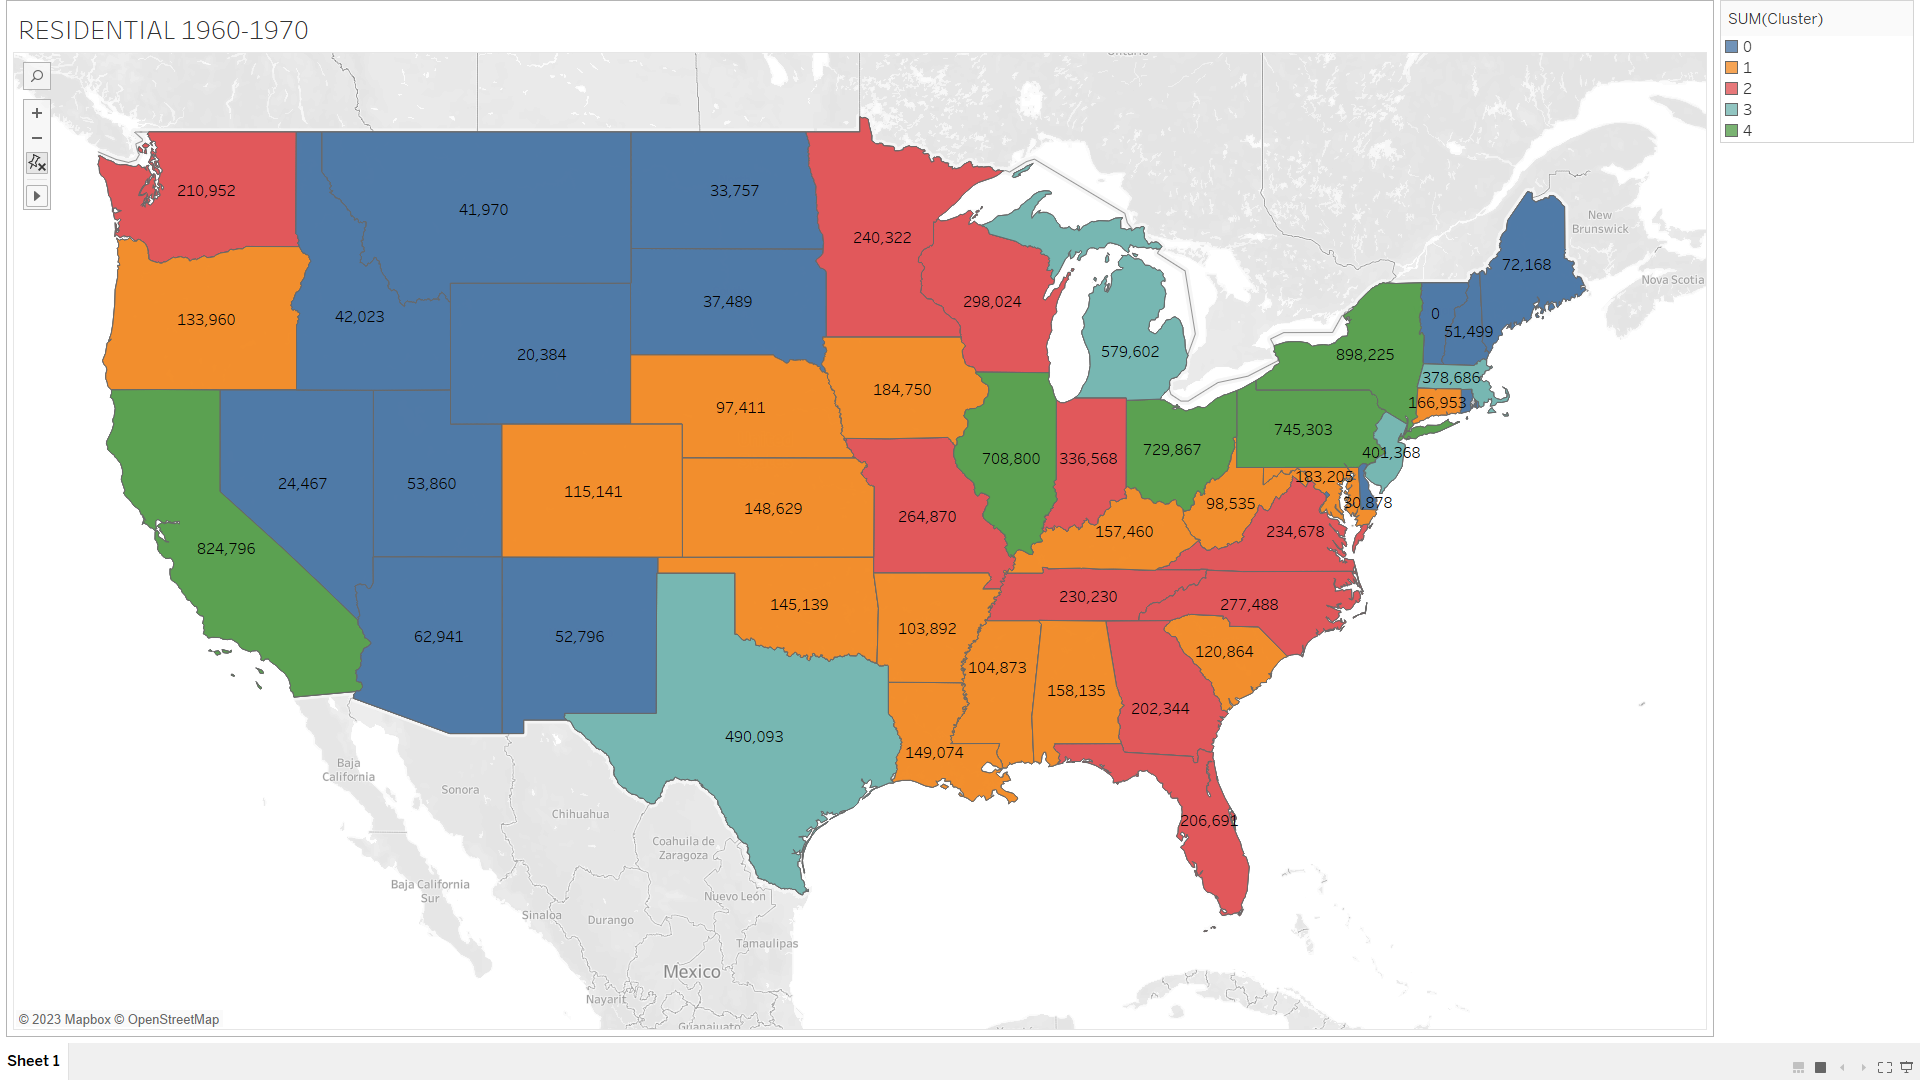

### Average for 1970 to 1980 and dividing it into 5 clusters

In [8]:
# Combine the average values for 1970-1980
average_values = pd.concat([average_1970_1980], axis=1)
average_values.columns = ['1970-1980']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1970-1980')

# Round off the values to 2 decimal places 
average_values['1970-1980'] = average_values['1970-1980'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1970-1980'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='1970-1980') 
    cluster_min = cluster_states['1970-1980'].min()
    cluster_max = cluster_states['1970-1980'].max()
    for state, value in zip(cluster_states.index, cluster_states['1970-1980']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Residential_1970-1980.csv', index=True)



States in Cluster 0:
State: HI - Value: 19690.4
State: WY - Value: 30136.5
State: DC - Value: 31905.4
State: AK - Value: 35658.9
State: DE - Value: 42141.0
State: ND - Value: 44127.2
State: VT - Value: 45286.7
State: SD - Value: 49158.9
State: NV - Value: 50182.1
State: MT - Value: 59621.7
State: NM - Value: 65017.7
State: ID - Value: 68059.2
State: RI - Value: 68241.5
State: NH - Value: 73033.1
State: UT - Value: 88049.1
State: ME - Value: 93075.2
State: NE - Value: 125898.6
State: AZ - Value: 129977.0
State: WV - Value: 131151.2
Cluster 0 Range: 19690.40 - 131151.20

States in Cluster 1:
State: MS - Value: 161023.5
State: AR - Value: 164167.7
State: CO - Value: 170955.8
State: SC - Value: 177929.3
State: KS - Value: 188543.2
State: OR - Value: 191657.0
State: CT - Value: 219124.9
State: OK - Value: 221832.2
State: IA - Value: 233041.3
State: KY - Value: 239185.4
State: AL - Value: 251400.2
State: LA - Value: 256442.1
State: MD - Value: 259183.6
Cluster 1 Range: 161023.50 - 259183.60

### Mapping Using Tablaue

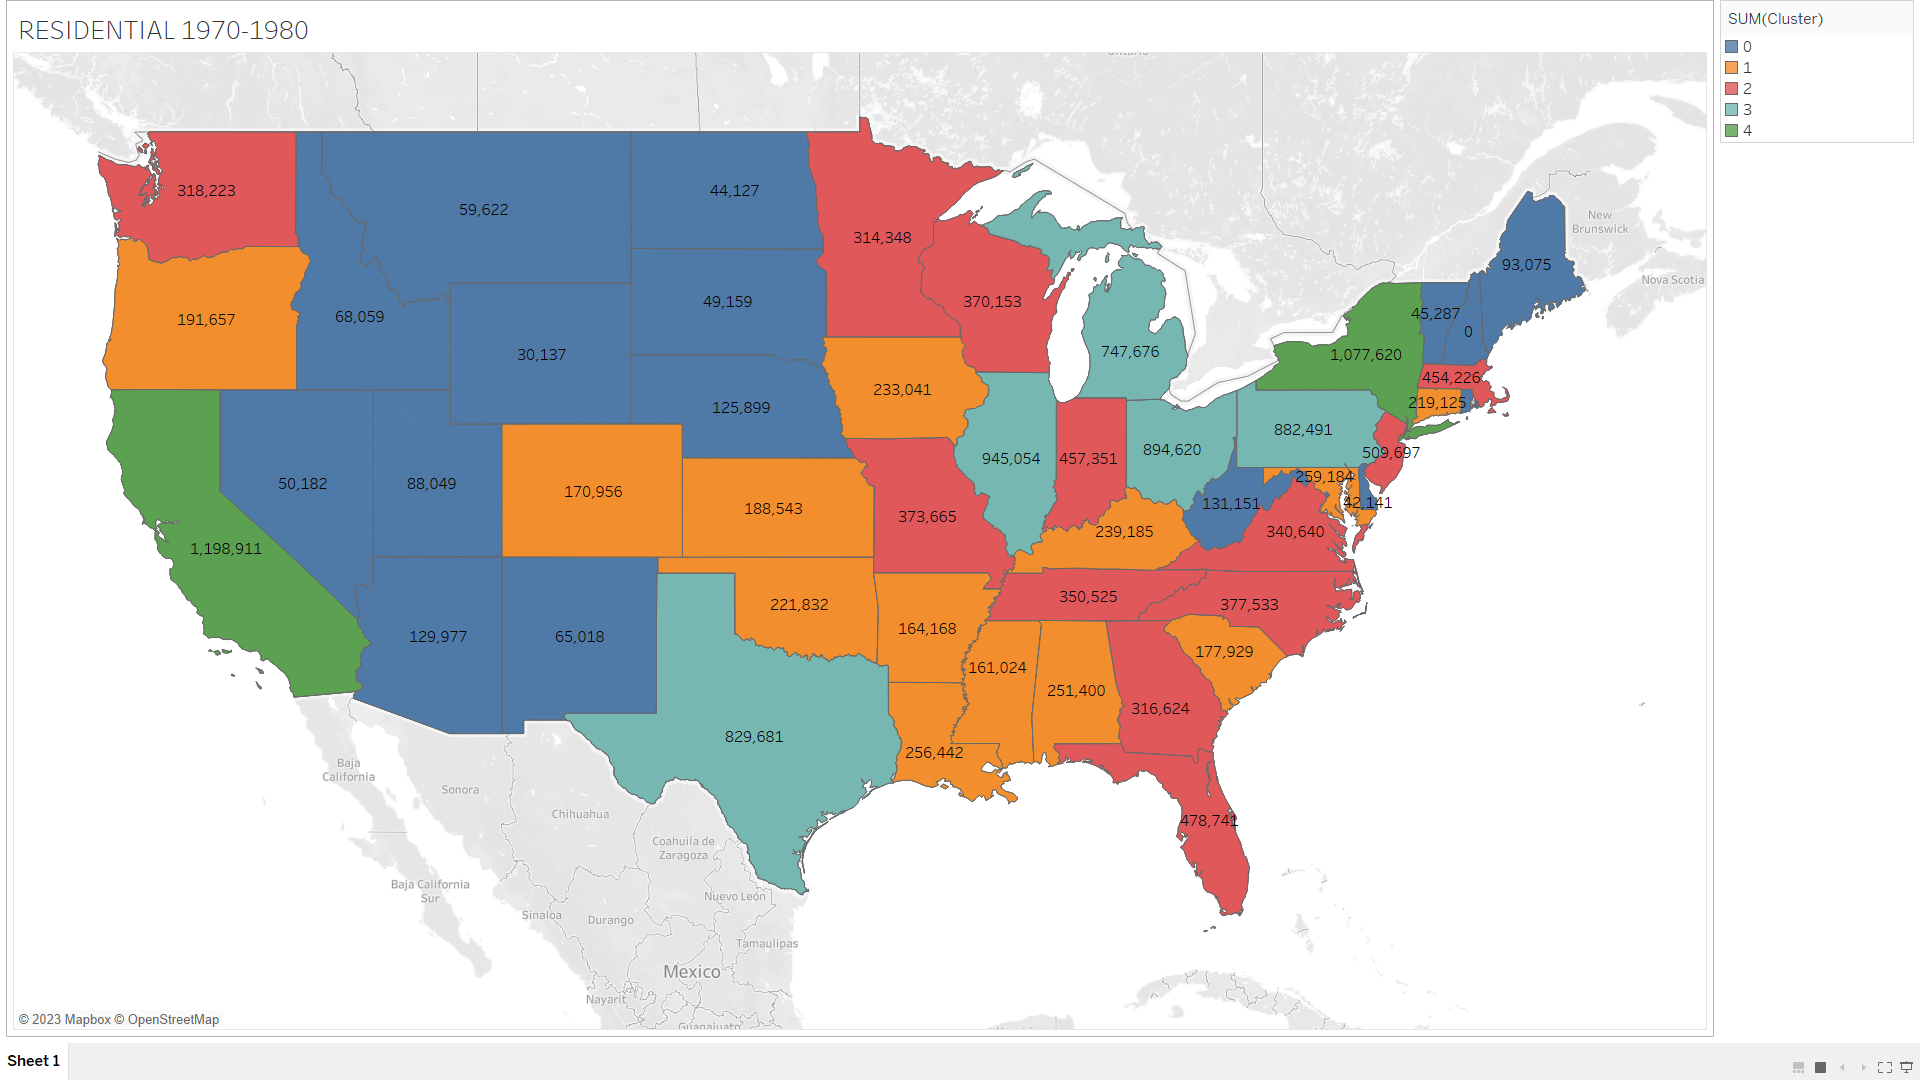

### Average for 1980 to 1990 and dividing it into 5 clusters

In [9]:
# Combine the average values for 1980-1990
average_values = pd.concat([average_1980_1990], axis=1)
average_values.columns = ['1980-1990']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1980-1990')

# Round off the values to 2 decimal places 
average_values['1980-1990'] = average_values['1980-1990'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1980-1990'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='1980-1990') 
    cluster_min = cluster_states['1980-1990'].min()
    cluster_max = cluster_states['1980-1990'].max()
    for state, value in zip(cluster_states.index, cluster_states['1980-1990']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Residential_1980-1990.csv', index=True)



States in Cluster 0:
State: HI - Value: 22182.8
State: DC - Value: 36156.8
State: WY - Value: 37542.8
State: VT - Value: 38675.6
State: AK - Value: 42911.5
State: DE - Value: 43964.7
State: ND - Value: 52042.9
State: SD - Value: 53907.2
State: MT - Value: 61851.0
State: RI - Value: 64832.3
State: NV - Value: 70536.1
State: NM - Value: 71376.7
State: NH - Value: 71451.8
State: ID - Value: 77054.9
State: ME - Value: 82025.6
State: UT - Value: 104056.5
State: NE - Value: 127695.9
State: WV - Value: 133818.2
Cluster 0 Range: 22182.80 - 133818.20

States in Cluster 1:
State: AR - Value: 158189.4
State: MS - Value: 168915.6
State: AZ - Value: 183678.3
State: KS - Value: 187255.6
State: OR - Value: 202104.7
State: CO - Value: 205918.2
State: IA - Value: 216933.6
State: SC - Value: 224021.6
State: CT - Value: 233712.4
State: OK - Value: 248899.5
State: KY - Value: 274565.0
State: AL - Value: 283626.4
State: LA - Value: 290951.5
State: MD - Value: 307544.6
State: MN - Value: 311944.7
Cluster 1

### Mapping using Tablaue

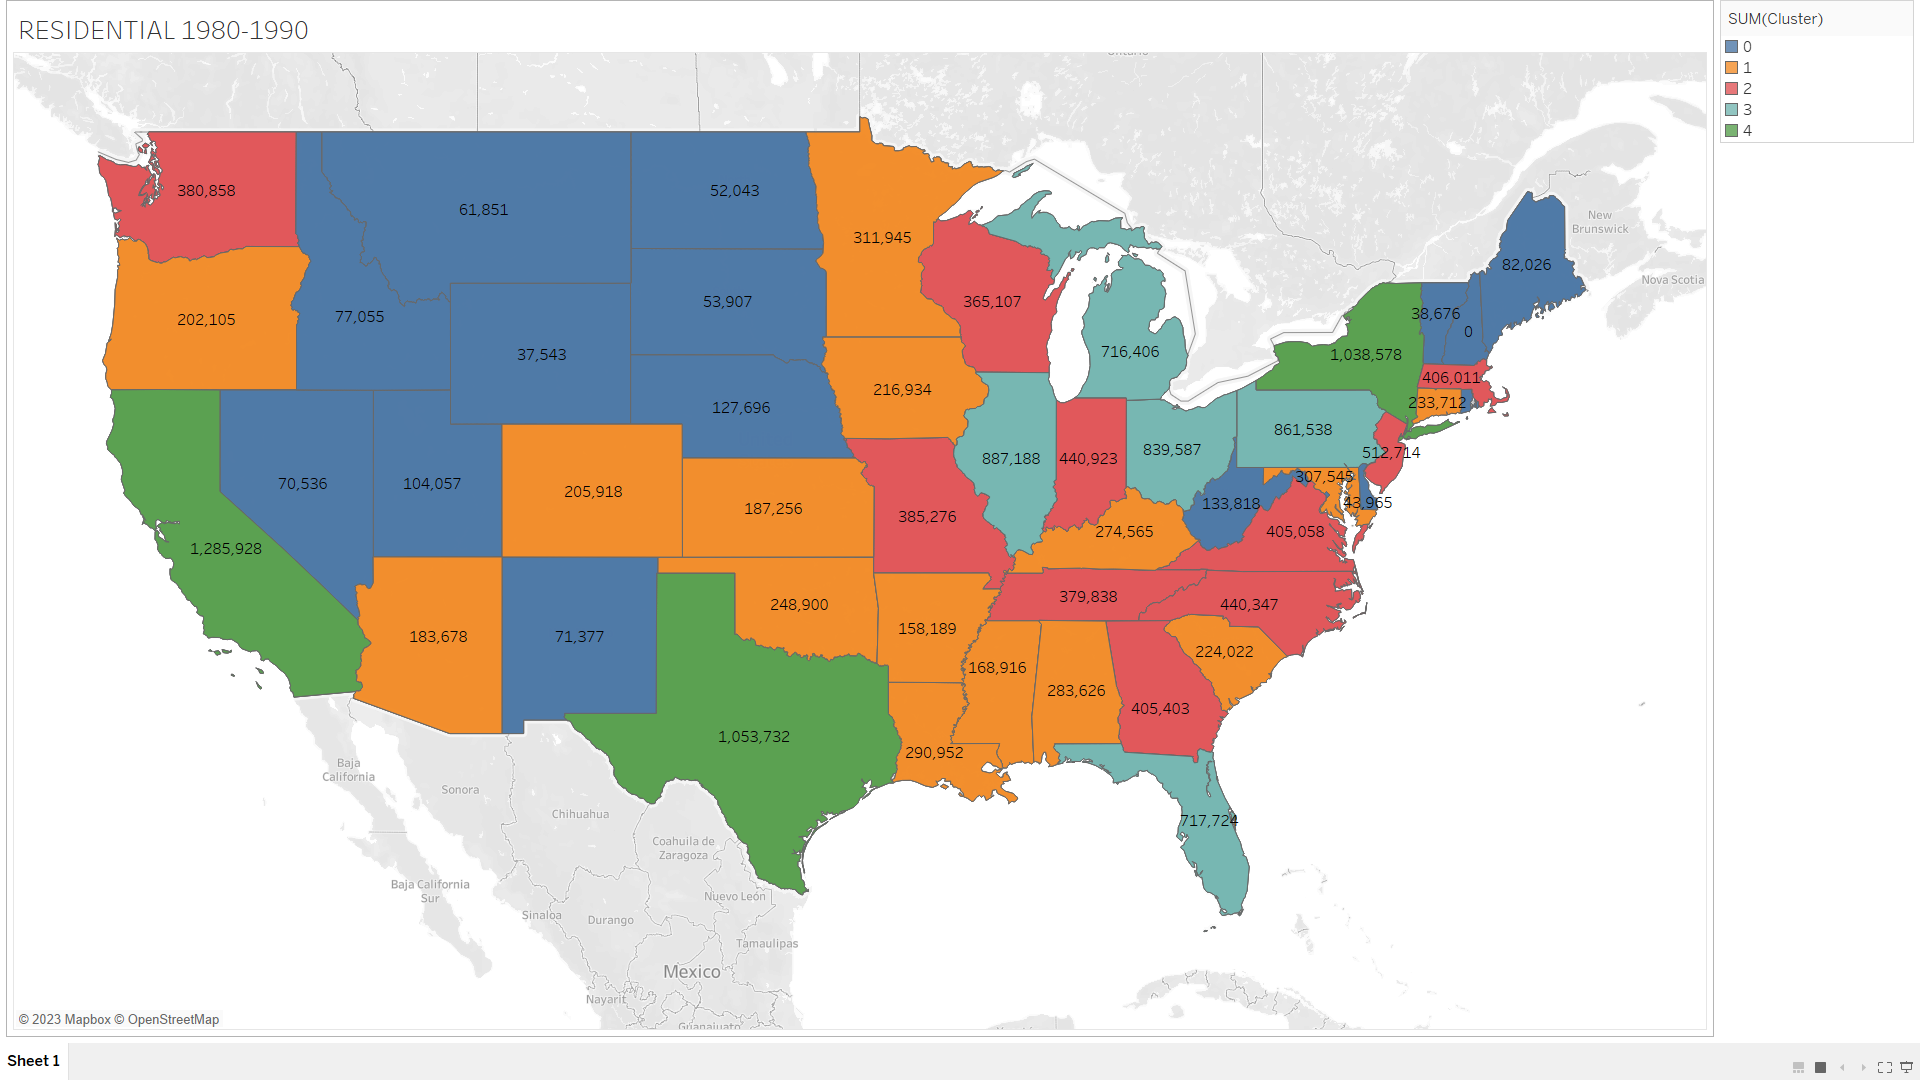

### Average for 1990 to 2000 and dividing it into 5 clusters

In [12]:
# Combine the average values for 1990-2000
average_values = pd.concat([average_1990_2000], axis=1)
average_values.columns = ['1990-2000']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1990-2000')

# Round off the values to 2 decimal places
average_values['1990-2000'] = average_values['1990-2000'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1990-2000'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='1990-2000')  
    cluster_min = cluster_states['1990-2000'].min()
    cluster_max = cluster_states['1990-2000'].max()
    for state, value in zip(cluster_states.index, cluster_states['1990-2000']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Residential_1990-2000.csv', index=True)


States in Cluster 0:
State: HI - Value: 30898.8
State: WY - Value: 37350.2
State: DC - Value: 38046.7
State: VT - Value: 39749.6
State: AK - Value: 49032.7
State: DE - Value: 56342.7
State: ND - Value: 56869.6
State: SD - Value: 60588.2
State: RI - Value: 65268.6
State: MT - Value: 67070.5
State: NH - Value: 80214.7
State: ME - Value: 81179.5
State: NM - Value: 89539.6
State: ID - Value: 94554.6
State: NV - Value: 116345.4
State: UT - Value: 118447.1
State: WV - Value: 137035.6
State: NE - Value: 143909.7
Cluster 0 Range: 30898.80 - 143909.70

States in Cluster 1:
State: AR - Value: 194203.5
State: MS - Value: 210690.8
State: KS - Value: 218154.2
State: IA - Value: 228241.5
State: OR - Value: 241020.9
State: CO - Value: 258555.4
State: CT - Value: 258920.5
State: AZ - Value: 265456.7
State: OK - Value: 274405.4
State: SC - Value: 289719.2
State: LA - Value: 294456.7
State: KY - Value: 326459.7
State: AL - Value: 336114.1
State: MN - Value: 351335.2
State: MD - Value: 381127.6
Cluster 

### Mapping Using Tablaue

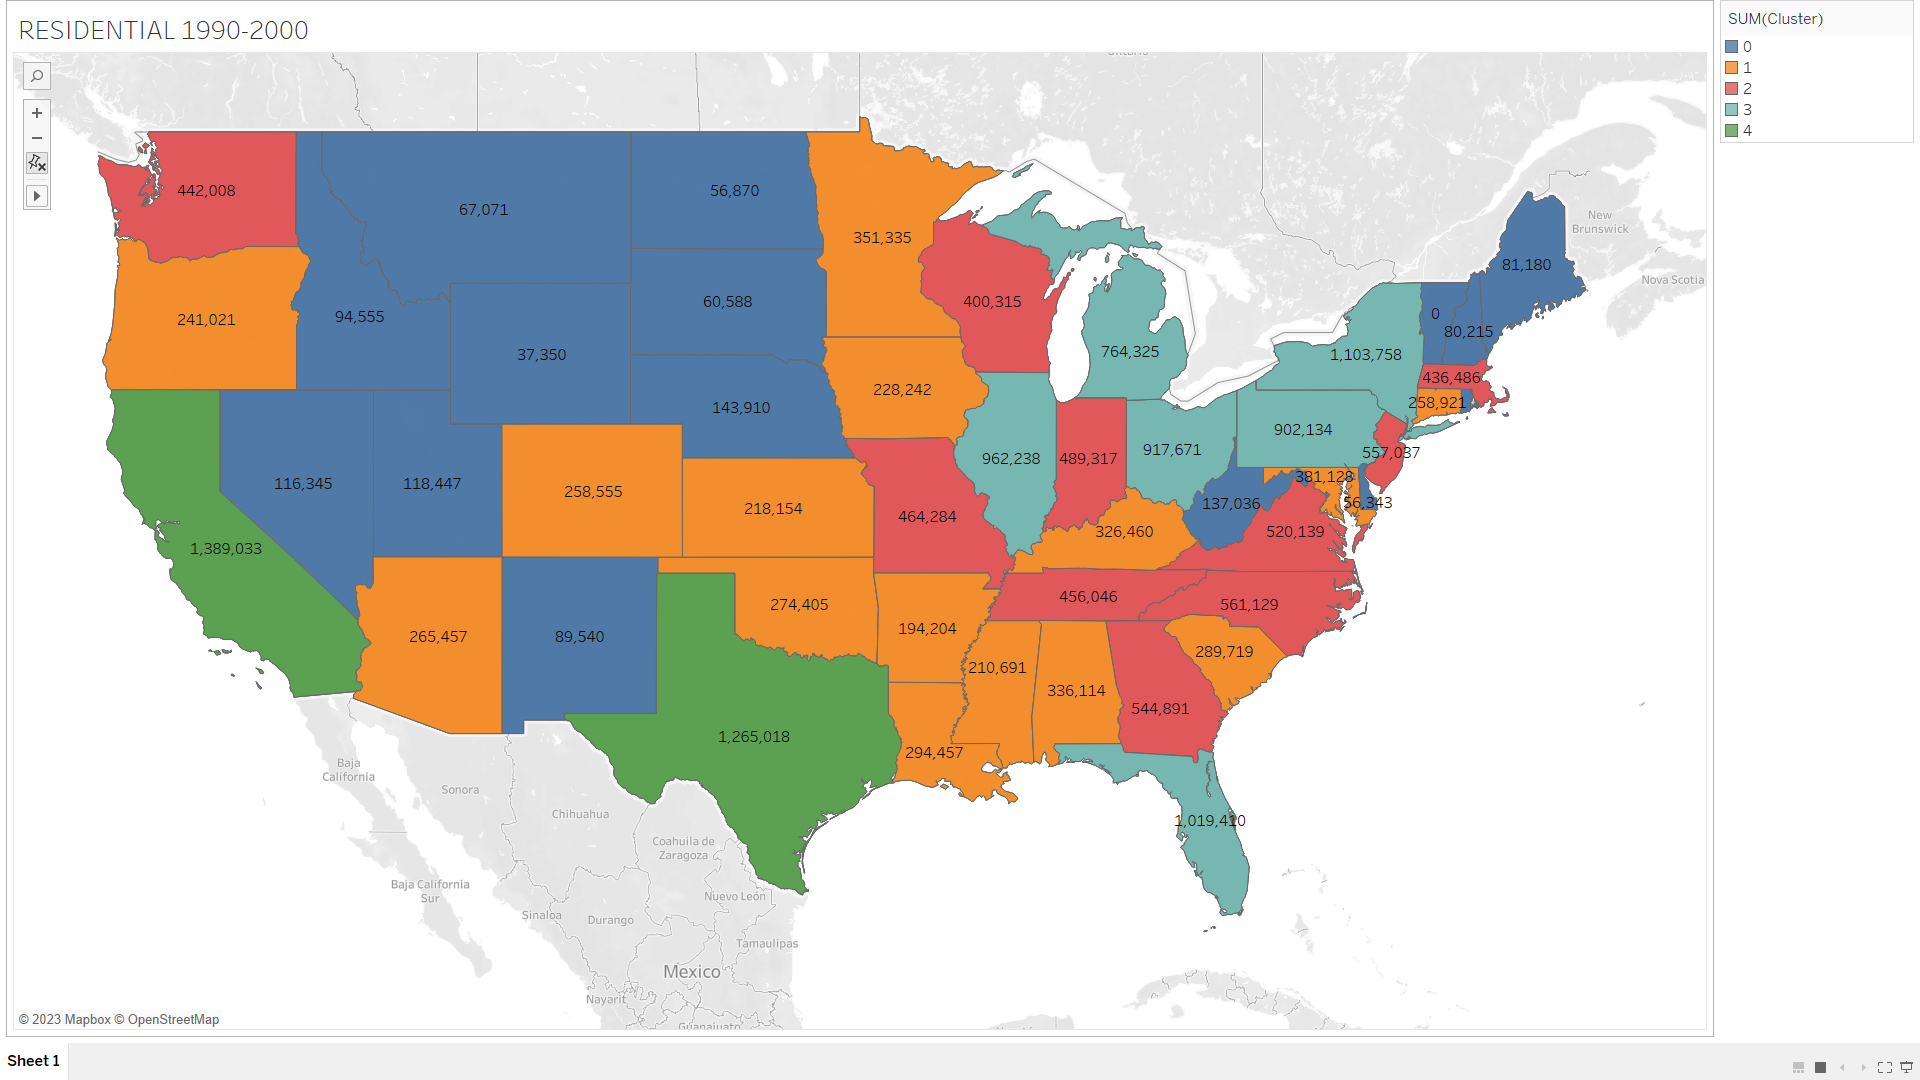

### Average for 2000 to 2010 and dividing it into 5 clusters

In [11]:
# Combine the average values for 2000-2010
average_values = pd.concat([average_2000_2010], axis=1)
average_values.columns = ['2000-2010']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='2000-2010')

# Round off the values to 2 decimal places 
average_values['2000-2010'] = average_values['2000-2010'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['2000-2010'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='2000-2010') 
    cluster_min = cluster_states['2000-2010'].min()
    cluster_max = cluster_states['2000-2010'].max()
    for state, value in zip(cluster_states.index, cluster_states['2000-2010']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Residential_2000-2010.csv', index=True)



States in Cluster 0:
State: HI - Value: 33162.2
State: DC - Value: 37721.3
State: WY - Value: 43960.0
State: VT - Value: 45760.0
State: AK - Value: 54103.6
State: ND - Value: 64192.1
State: RI - Value: 66595.1
State: SD - Value: 67506.6
State: DE - Value: 67814.3
State: MT - Value: 80969.0
State: NH - Value: 90139.4
State: ME - Value: 92842.5
State: NM - Value: 112574.1
State: ID - Value: 118505.0
State: UT - Value: 152129.9
State: NV - Value: 156013.5
State: NE - Value: 158295.0
State: WV - Value: 159829.2
Cluster 0 Range: 33162.20 - 159829.20

States in Cluster 1:
State: AR - Value: 228406.9
State: MS - Value: 231595.7
State: KS - Value: 236641.6
State: IA - Value: 241108.6
State: OR - Value: 250313.0
State: CT - Value: 269099.0
State: OK - Value: 302217.4
State: LA - Value: 319299.5
State: CO - Value: 331015.1
State: SC - Value: 357249.7
State: AZ - Value: 365566.2
State: KY - Value: 381778.5
State: AL - Value: 382550.1
State: MN - Value: 404595.3
State: MD - Value: 430214.2
State:

### Mapping Using Tablaue

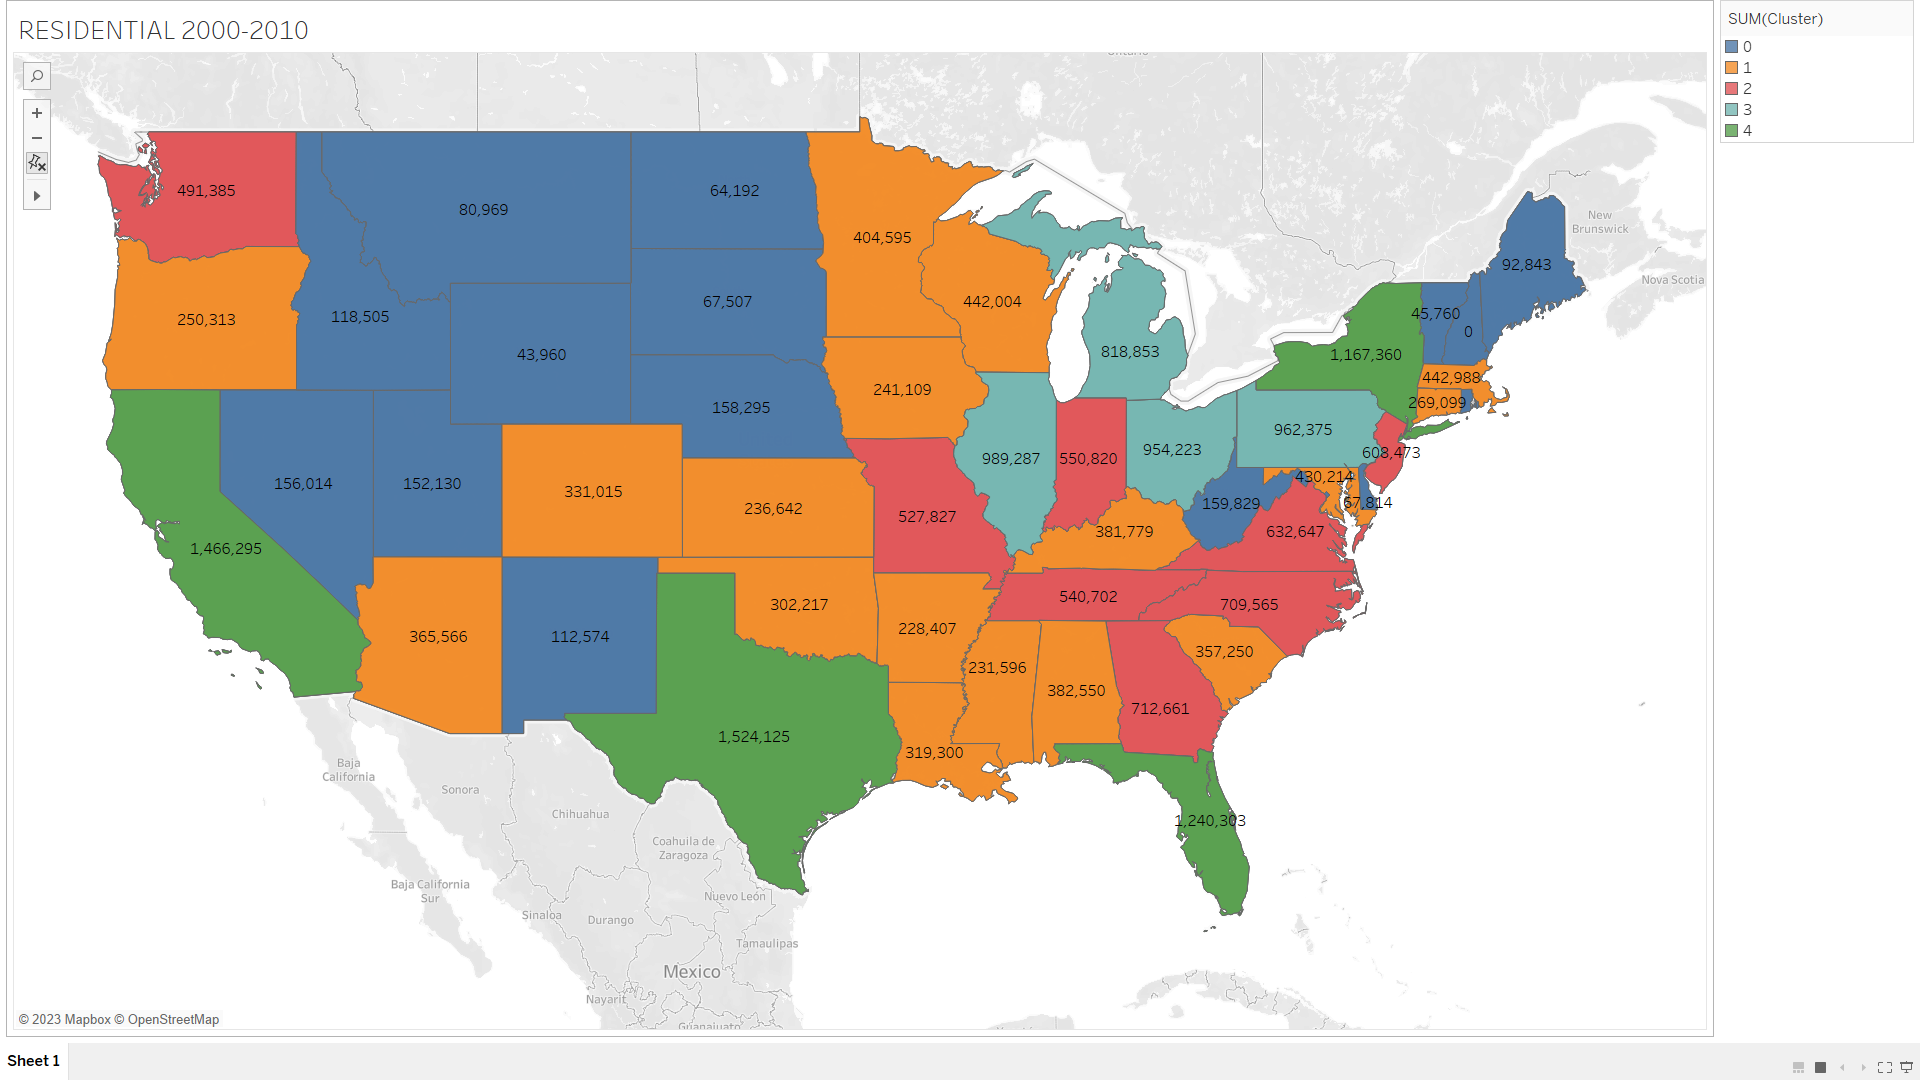

### Average for 2010 to 2020 and dividing it into 5 clusters

In [12]:
# Combine the average values for 2010-2020
average_values = pd.concat([average_2010_2020], axis=1)
average_values.columns = ['2010-2020']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='2010-2020')

# Round off the values to 2 decimal places 
average_values['2010-2020'] = average_values['2010-2020'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['2010-2020'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='2010-2020')  
    cluster_min = cluster_states['2010-2020'].min()
    cluster_max = cluster_states['2010-2020'].max()
    for state, value in zip(cluster_states.index, cluster_states['2010-2020']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Residential_2010-2020.csv', index=True)



States in Cluster 0:
State: HI - Value: 32992.6
State: DC - Value: 38397.5
State: VT - Value: 44268.4
State: WY - Value: 49737.3
State: AK - Value: 51433.7
State: RI - Value: 61790.6
State: DE - Value: 64495.2
State: SD - Value: 70036.8
State: ND - Value: 71195.8
State: MT - Value: 92006.9
State: ME - Value: 96517.8
State: NH - Value: 96719.5
State: NM - Value: 120201.7
State: ID - Value: 126943.8
State: NE - Value: 157566.7
State: WV - Value: 161448.2
State: NV - Value: 162536.3
State: UT - Value: 172200.5
State: MS - Value: 199217.6
Cluster 0 Range: 32992.60 - 199217.60

States in Cluster 1:
State: KS - Value: 226295.0
State: AR - Value: 228044.5
State: IA - Value: 237931.0
State: CT - Value: 239150.9
State: OR - Value: 249826.4
State: OK - Value: 300313.7
State: LA - Value: 331826.6
State: AL - Value: 350533.7
State: CO - Value: 356183.0
State: KY - Value: 362362.0
State: SC - Value: 362965.2
State: AZ - Value: 397890.0
State: MN - Value: 402318.8
State: MD - Value: 409647.3
State:

### Mapping using Tablaue

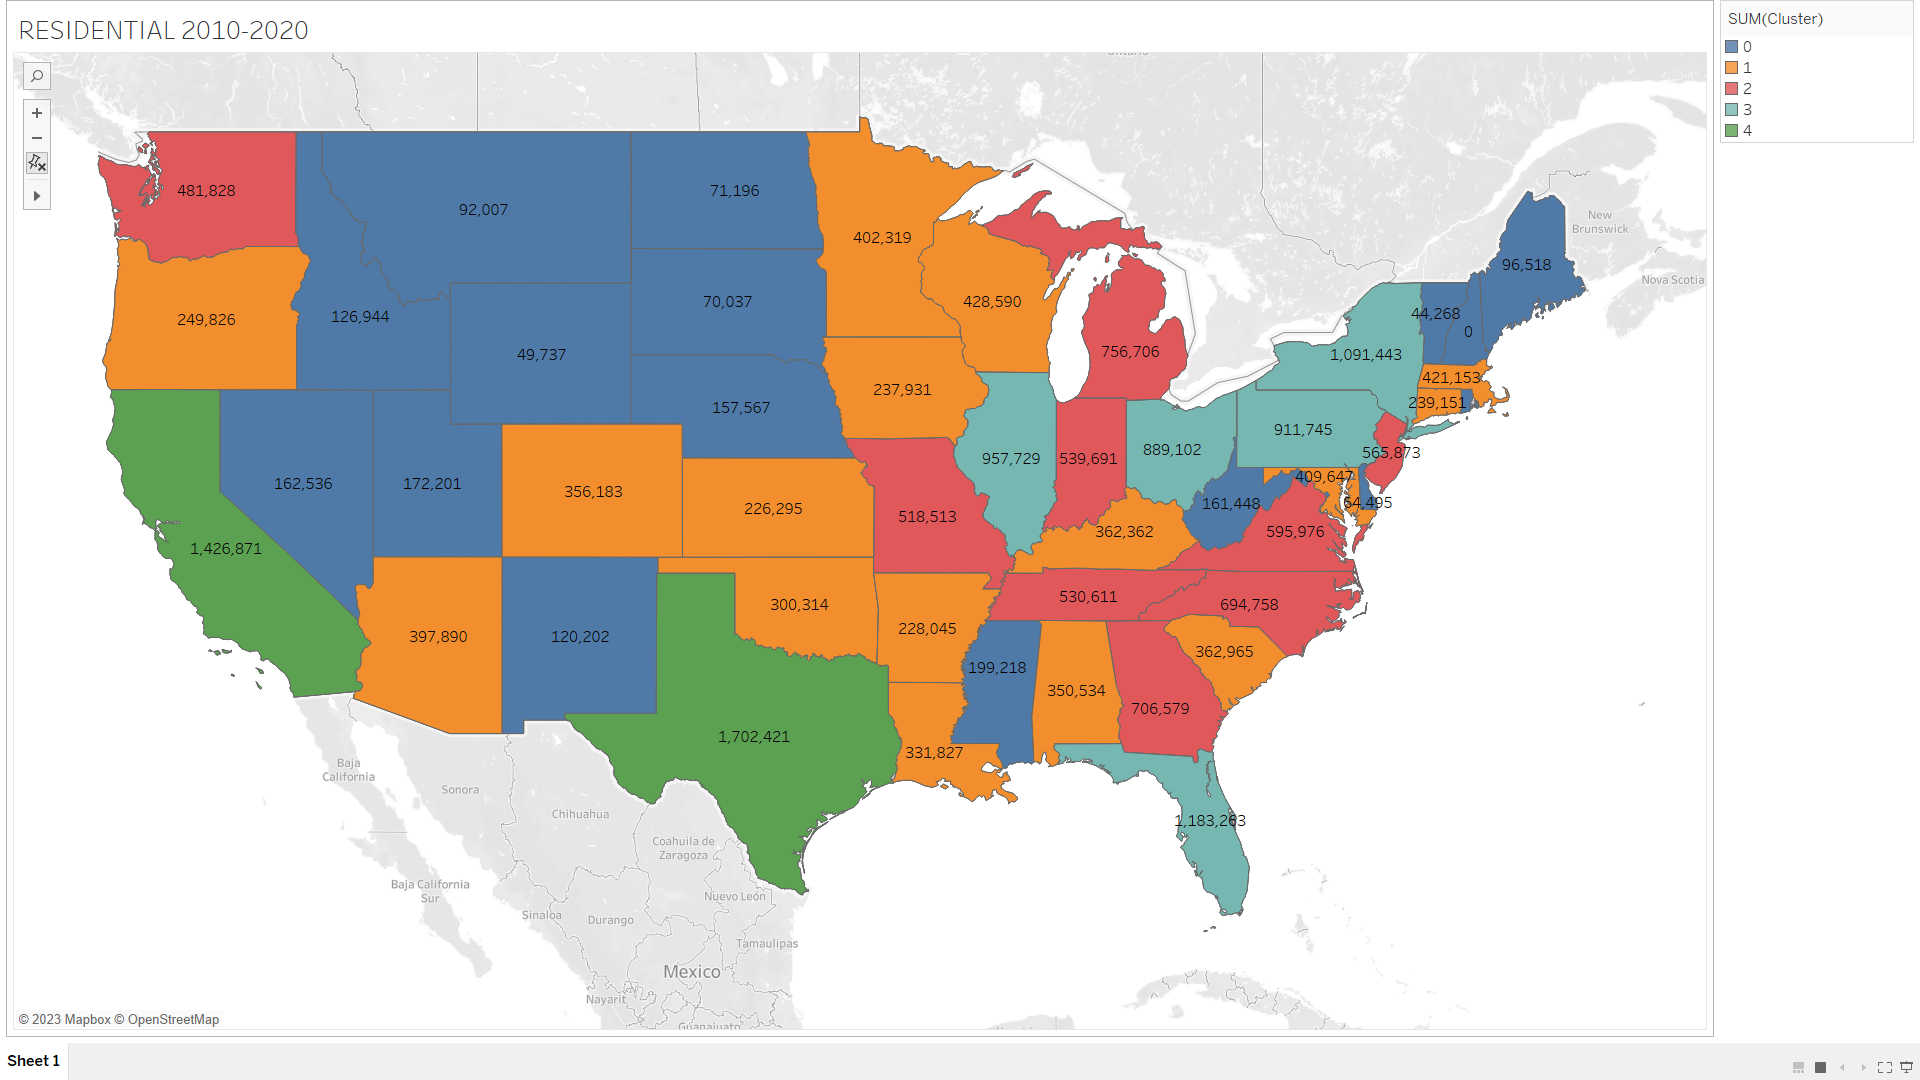

## Progression of the top 2 states 

### Progress of the states from 1960 to 1970

In [13]:
# Load the CSV file and read it
file_path = 'Residential_1960_1970.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information 
state_abbreviations = ['TX','CA']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 2000-2010 interval
print("Information for states in the 1960-1970 interval:")
print(state_info)


Information for states in the 1960-1970 interval:
    1960-1970  Cluster State Full Name
TX  490093.36        3           Texas
CA  824796.27        4      California


### Progress of the states from 1970 to 1980

In [14]:
# Load the CSV file and read it
file_path = 'Residential_1970-1980.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information 
state_abbreviations = ['TX','CA']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1970-1980 interval
print("Information for states in the 1970-1980 interval:")
print(state_info)


Information for states in the 1970-1980 interval:
    1970-1980  Cluster State Full Name
TX   829681.0        3           Texas
CA  1198910.6        4      California


### Progress of the states from 1980 to 1990

In [15]:
# Load the CSV file and read it
file_path = 'Residential_1980-1990.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information 
state_abbreviations = ['TX','CA']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1970-1980 interval
print("Information for states in the 1980-1990 interval:")
print(state_info)


Information for states in the 1980-1990 interval:
    1980-1990  Cluster State Full Name
TX  1053732.2        4           Texas
CA  1285928.0        4      California


### Progress of the states from 1999 to 2000

In [16]:
# Load the CSV file and read it
file_path = 'Residential_1990-2000.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information 
state_abbreviations = ['TX','CA']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1970-1980 interval
print("Information for states in the 1990-2000 interval:")
print(state_info)


Information for states in the 1990-2000 interval:
    1990-2000  Cluster State Full Name
TX  1265017.7        4           Texas
CA  1389033.3        4      California


### Progress of the states from 2000 to 2010

In [17]:
# Load the CSV file and read it
file_path = 'Residential_2000-2010.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information 
state_abbreviations = ['TX','CA']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 2000-2010 interval
print("Information for states in the 2000-2010 interval:")
print(state_info)


Information for states in the 2000-2010 interval:
    2000-2010  Cluster State Full Name
CA  1466295.1        4      California
TX  1524124.6        4           Texas


### Progress of the states from 2010 to 2020

In [18]:
# Load the CSV file and read it
file_path = 'Residential_2010-2020.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information 
state_abbreviations = ['TX','CA']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1970-1980 interval
print("Information for states in the 2010-2020 interval:")
print(state_info)


Information for states in the 2010-2020 interval:
    2010-2020  Cluster State Full Name
CA  1426870.6        4      California
TX  1702421.2        4           Texas


### Plotting Using Matplot

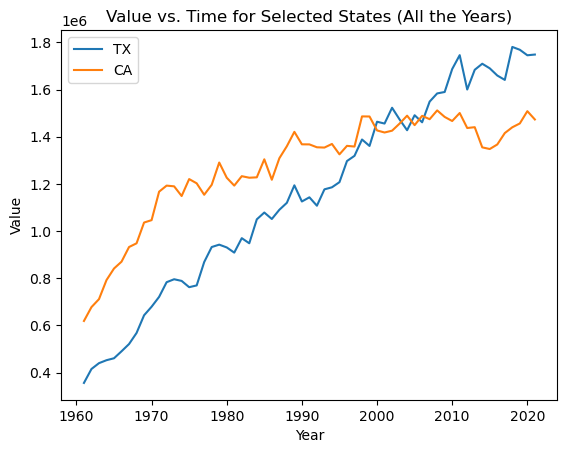

In [7]:
# Select only the 60 columns
Residential_60 = Residential.iloc[:, 1:62]

# Transpose the data to have years as rows and states as columns
Residential_T_60 = Residential_60.transpose()

# list of state abbreviations to plot
state_abbreviations =  ['TX','CA']

# Plot data for the selected states with the correct legend label
for state in state_abbreviations:
    plt.plot(Residential_T_60.index, Residential_T_60[state], label=state)

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Value vs. Time for Selected States (All the Years)')
plt.legend(loc='best')

# Show the plot
plt.show()

## Deep Learning Forecasting

### LSTM

In [4]:
# sequence length and accuracy threshold
sequence_length_lstm = 40
accuracy_threshold_lstm = 0.01  

# Loop through each selected state
state_mse_lstm = {}
state_rmse_lstm = {}
state_forecasts_lstm = {}
state_predictions_lstm = {} 

for state in ['TX','CA']:
    # Extract the data for the selected state
    data = Residential.loc[state].values

    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))

    # Create sequences for LSTM
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_lstm):
        seq = scaled_data[i:i + sequence_length_lstm]
        target = scaled_data[i + sequence_length_lstm]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)

    # Include data beyond 1969 for training
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]

    # Create and train an LSTM model
    model_lstm = Sequential()
    model_lstm.add(LSTM(units=50, activation='relu', input_shape=(sequence_length_lstm, 1)))
    model_lstm.add(Dense(units=1))
    model_lstm.compile(optimizer='adam', loss='mean_squared_error')

    # Lists to store forecasts, actual values, and predictions
    forecasts_lstm = []
    actual_values_lstm = []
    predictions_lstm = []

    # Iterate through the forecast years
    current_sequence_lstm = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
        actual_value_lstm = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_lstm.reshape(1, sequence_length_lstm, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_lstm)
        mse_lstm = mean_squared_error([actual_value_lstm], [forecast_lstm[0]])
        model_lstm.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_lstm[0])

        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_lstm > accuracy_threshold_lstm:
            continue
        else:
            forecasts_lstm.append(forecast_lstm[0])
            actual_values_lstm.append(actual_value_lstm)

            # Store the prediction for the current year
            prediction_lstm = scaler.inverse_transform(forecast_lstm.reshape(-1, 1))[0][0]
            predictions_lstm.append(prediction_lstm)

    # Inverse transform the forecasts and actual values to the original scale
    forecasts_lstm = scaler.inverse_transform(np.array(forecasts_lstm).reshape(-1, 1))
    actual_values_lstm = scaler.inverse_transform(np.array(actual_values_lstm).reshape(-1, 1))

    # Calculate the mean squared error (MSE) for the forecasts
    mse_lstm = mean_squared_error(actual_values_lstm, forecasts_lstm)

    # Calculate the root mean squared error (RMSE)
    rmse_lstm = np.sqrt(mse_lstm)

    state_mse_lstm[state] = mse_lstm
    state_rmse_lstm[state] = rmse_lstm

    # Forecast for 2022 and 2023
    forecast_2022_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2022_lstm[0])
    forecast_2023_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_lstm = scaler.inverse_transform(forecast_2022_lstm.reshape(-1, 1))[0][0]
    forecast_2023_lstm = scaler.inverse_transform(forecast_2023_lstm.reshape(-1, 1))[0][0]
    state_forecasts_lstm[state] = {'2022': forecast_2022_lstm, '2023': forecast_2023_lstm}

    # Store predictions for 2019, 2020, and 2021
    forecast_2019_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2019_lstm[0])
    forecast_2020_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2020_lstm[0])
    forecast_2021_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2021_lstm[0])

    # Inverse transform the predictions to the original scale
    prediction_2019_lstm = scaler.inverse_transform(forecast_2019_lstm.reshape(-1, 1))[0][0]
    prediction_2020_lstm = scaler.inverse_transform(forecast_2020_lstm.reshape(-1, 1))[0][0]
    prediction_2021_lstm = scaler.inverse_transform(forecast_2021_lstm.reshape(-1, 1))[0][0]
    state_predictions_lstm[state] = {'2019': prediction_2019_lstm, '2020': prediction_2020_lstm, '2021': prediction_2021_lstm}

# Print MSE and RMSE for all states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_lstm.items():
    print(f"MSE for {state} (LSTM): {mse_value:.2f}")

print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_lstm.items():
    print(f"RMSE for {state} (LSTM): {rmse_value:.2f}")

# Print forecasts for all states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_lstm.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_lstm.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year
state_accuracies_lstm = {}

for state in state_predictions_lstm:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Residential.loc[state].loc[int(year)]
        predicted_value = state_predictions_lstm[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_lstm[state] = accuracies_state

# Print accuracies for each state and year
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States:")
for state, accuracies_state in state_accuracies_lstm.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 2s 2s/step
Epoch 1/20
23/23 [==============================] - 12s 23ms/step - loss: 0.6521
Epoch 2/20
23/23 [==============================] - 1s 25ms/step - loss: 0.0975
Epoch 3/20
23/23 [==============================] - 1s 23ms/step - loss: 0.0337
Epoch 4/20
23/23 [==============================] - 1s 25ms/step - loss: 0.0265
Epoch 5/20
23/23 [==============================] - 1s 25ms/step - loss: 0.0265
Epoch 6/20
23/23 [==============================] - 0s 19ms/step - loss: 0.0360
Epoch 7/20
23/23 [==============================] - 0s 19ms/step - loss: 0.0246
Epoch 8/20
23/23 [==============================] - 1s 23ms/step - loss: 0.0327
Epoch 9/20
23/23 [==============================] - 0s 22ms/step - loss: 0.0214
Epoch 10/20
23/23 [==============================] - 1s 23ms/step - loss: 0.0232
Epoch 11/20
23/23 [==============================] - 0s 20ms/step - loss: 0.0194
Epoch 12/20
23/23 [==============================] - 0s 20ms/step -

32/32 [==============================] - 1s 27ms/step - loss: 0.0107
Epoch 18/20
32/32 [==============================] - 1s 27ms/step - loss: 0.0099
Epoch 19/20
32/32 [==============================] - 1s 30ms/step - loss: 0.0099
Epoch 20/20
1/1 [==============================] - 0s 362ms/step
Epoch 1/20
33/33 [==============================] - 1s 18ms/step - loss: 0.0100
Epoch 2/20
33/33 [==============================] - 1s 29ms/step - loss: 0.0091
Epoch 3/20
33/33 [==============================] - 1s 33ms/step - loss: 0.0106
Epoch 4/20
33/33 [==============================] - 1s 32ms/step - loss: 0.0101
Epoch 5/20
33/33 [==============================] - 1s 26ms/step - loss: 0.0099
Epoch 6/20
33/33 [==============================] - 1s 36ms/step - loss: 0.0096
Epoch 7/20
33/33 [==============================] - 1s 29ms/step - loss: 0.0092
Epoch 8/20
33/33 [==============================] - 1s 30ms/step - loss: 0.0090
Epoch 9/20
33/33 [==============================] - 1s 36ms/step

42/42 [==============================] - 1s 19ms/step - loss: 0.0078
Epoch 14/20
42/42 [==============================] - 1s 20ms/step - loss: 0.0084
Epoch 15/20
42/42 [==============================] - 1s 21ms/step - loss: 0.0075
Epoch 16/20
42/42 [==============================] - 1s 20ms/step - loss: 0.0081
Epoch 17/20
42/42 [==============================] - 1s 19ms/step - loss: 0.0074
Epoch 18/20
42/42 [==============================] - 1s 19ms/step - loss: 0.0090
Epoch 19/20
42/42 [==============================] - 1s 21ms/step - loss: 0.0078
Epoch 20/20
1/1 [==============================] - 0s 88ms/step
Epoch 1/20
43/43 [==============================] - 1s 20ms/step - loss: 0.0084
Epoch 2/20
43/43 [==============================] - 1s 20ms/step - loss: 0.0079
Epoch 3/20
43/43 [==============================] - 1s 20ms/step - loss: 0.0078
Epoch 4/20
43/43 [==============================] - 1s 19ms/step - loss: 0.0068
Epoch 5/20
43/43 [==============================] - 1s 21ms/s

52/52 [==============================] - 1s 12ms/step - loss: 0.0058
Epoch 10/20
52/52 [==============================] - 1s 16ms/step - loss: 0.0059
Epoch 11/20
52/52 [==============================] - 1s 16ms/step - loss: 0.0052
Epoch 12/20
52/52 [==============================] - 1s 20ms/step - loss: 0.0061
Epoch 13/20
52/52 [==============================] - 1s 23ms/step - loss: 0.0066
Epoch 14/20
52/52 [==============================] - 1s 19ms/step - loss: 0.0057
Epoch 15/20
52/52 [==============================] - 1s 18ms/step - loss: 0.0063
Epoch 16/20
52/52 [==============================] - 1s 26ms/step - loss: 0.0058
Epoch 17/20
52/52 [==============================] - 1s 24ms/step - loss: 0.0054
Epoch 18/20
52/52 [==============================] - 1s 23ms/step - loss: 0.0053
Epoch 19/20
52/52 [==============================] - 1s 18ms/step - loss: 0.0055
Epoch 20/20
1/1 [==============================] - 0s 47ms/step
Epoch 1/20
53/53 [==============================] - 1s 18

62/62 [==============================] - 1s 11ms/step - loss: 0.0048
Epoch 6/20
62/62 [==============================] - 1s 12ms/step - loss: 0.0044
Epoch 7/20
62/62 [==============================] - 1s 13ms/step - loss: 0.0048
Epoch 8/20
62/62 [==============================] - 1s 13ms/step - loss: 0.0043
Epoch 9/20
62/62 [==============================] - 1s 14ms/step - loss: 0.0046
Epoch 10/20
62/62 [==============================] - 1s 12ms/step - loss: 0.0049
Epoch 11/20
62/62 [==============================] - 1s 13ms/step - loss: 0.0042
Epoch 12/20
62/62 [==============================] - 1s 13ms/step - loss: 0.0053
Epoch 13/20
62/62 [==============================] - 1s 12ms/step - loss: 0.0043
Epoch 14/20
62/62 [==============================] - 1s 12ms/step - loss: 0.0043
Epoch 15/20
62/62 [==============================] - 1s 14ms/step - loss: 0.0042
Epoch 16/20
62/62 [==============================] - 1s 14ms/step - loss: 0.0046
Epoch 17/20
62/62 [=========================

1/1 [==============================] - 0s 31ms/step
Epoch 1/20
27/27 [==============================] - 0s 11ms/step - loss: 0.0058
Epoch 2/20
27/27 [==============================] - 0s 12ms/step - loss: 0.0043
Epoch 3/20
27/27 [==============================] - 1s 20ms/step - loss: 0.0047
Epoch 4/20
27/27 [==============================] - 0s 15ms/step - loss: 0.0046
Epoch 5/20
27/27 [==============================] - 0s 16ms/step - loss: 0.0043
Epoch 6/20
27/27 [==============================] - 0s 12ms/step - loss: 0.0042
Epoch 7/20
27/27 [==============================] - 0s 14ms/step - loss: 0.0044
Epoch 8/20
27/27 [==============================] - 0s 12ms/step - loss: 0.0047
Epoch 9/20
27/27 [==============================] - 0s 12ms/step - loss: 0.0048
Epoch 10/20
27/27 [==============================] - 0s 12ms/step - loss: 0.0043
Epoch 11/20
27/27 [==============================] - 0s 12ms/step - loss: 0.0045
Epoch 12/20
27/27 [==============================] - 0s 12ms/step 

36/36 [==============================] - 0s 11ms/step - loss: 0.0042
Epoch 18/20
36/36 [==============================] - 0s 11ms/step - loss: 0.0039
Epoch 19/20
36/36 [==============================] - 0s 11ms/step - loss: 0.0041
Epoch 20/20
1/1 [==============================] - 0s 49ms/step
Epoch 1/20
37/37 [==============================] - 0s 12ms/step - loss: 0.0036
Epoch 2/20
37/37 [==============================] - 0s 12ms/step - loss: 0.0034
Epoch 3/20
37/37 [==============================] - 0s 11ms/step - loss: 0.0034
Epoch 4/20
37/37 [==============================] - 0s 12ms/step - loss: 0.0046
Epoch 5/20
37/37 [==============================] - 0s 11ms/step - loss: 0.0036
Epoch 6/20
37/37 [==============================] - 0s 11ms/step - loss: 0.0037
Epoch 7/20
37/37 [==============================] - 0s 11ms/step - loss: 0.0035
Epoch 8/20
37/37 [==============================] - 0s 11ms/step - loss: 0.0035
Epoch 9/20
37/37 [==============================] - 0s 11ms/step 

46/46 [==============================] - 1s 11ms/step - loss: 0.0032
Epoch 14/20
46/46 [==============================] - 1s 11ms/step - loss: 0.0030
Epoch 15/20
46/46 [==============================] - 1s 11ms/step - loss: 0.0032
Epoch 16/20
46/46 [==============================] - 1s 11ms/step - loss: 0.0031
Epoch 17/20
46/46 [==============================] - 1s 11ms/step - loss: 0.0030
Epoch 18/20
46/46 [==============================] - 1s 11ms/step - loss: 0.0030
Epoch 19/20
46/46 [==============================] - 1s 12ms/step - loss: 0.0031
Epoch 20/20
1/1 [==============================] - 0s 66ms/step
Epoch 1/20
47/47 [==============================] - 1s 11ms/step - loss: 0.0029
Epoch 2/20
47/47 [==============================] - 1s 11ms/step - loss: 0.0030
Epoch 3/20
47/47 [==============================] - 1s 11ms/step - loss: 0.0028
Epoch 4/20
47/47 [==============================] - 1s 11ms/step - loss: 0.0029
Epoch 5/20
47/47 [==============================] - 1s 11ms/s

56/56 [==============================] - 1s 20ms/step - loss: 0.0025
Epoch 10/20
56/56 [==============================] - 1s 20ms/step - loss: 0.0026
Epoch 11/20
56/56 [==============================] - 1s 19ms/step - loss: 0.0027
Epoch 12/20
56/56 [==============================] - 1s 20ms/step - loss: 0.0027
Epoch 13/20
56/56 [==============================] - 1s 16ms/step - loss: 0.0024
Epoch 14/20
56/56 [==============================] - 1s 19ms/step - loss: 0.0024
Epoch 15/20
56/56 [==============================] - 1s 21ms/step - loss: 0.0028
Epoch 16/20
56/56 [==============================] - 1s 19ms/step - loss: 0.0025
Epoch 17/20
56/56 [==============================] - 1s 21ms/step - loss: 0.0028
Epoch 18/20
56/56 [==============================] - 1s 20ms/step - loss: 0.0031
Epoch 19/20
56/56 [==============================] - 1s 20ms/step - loss: 0.0027
Epoch 20/20
1/1 [==============================] - 0s 49ms/step
Epoch 1/20
57/57 [==============================] - 1s 19

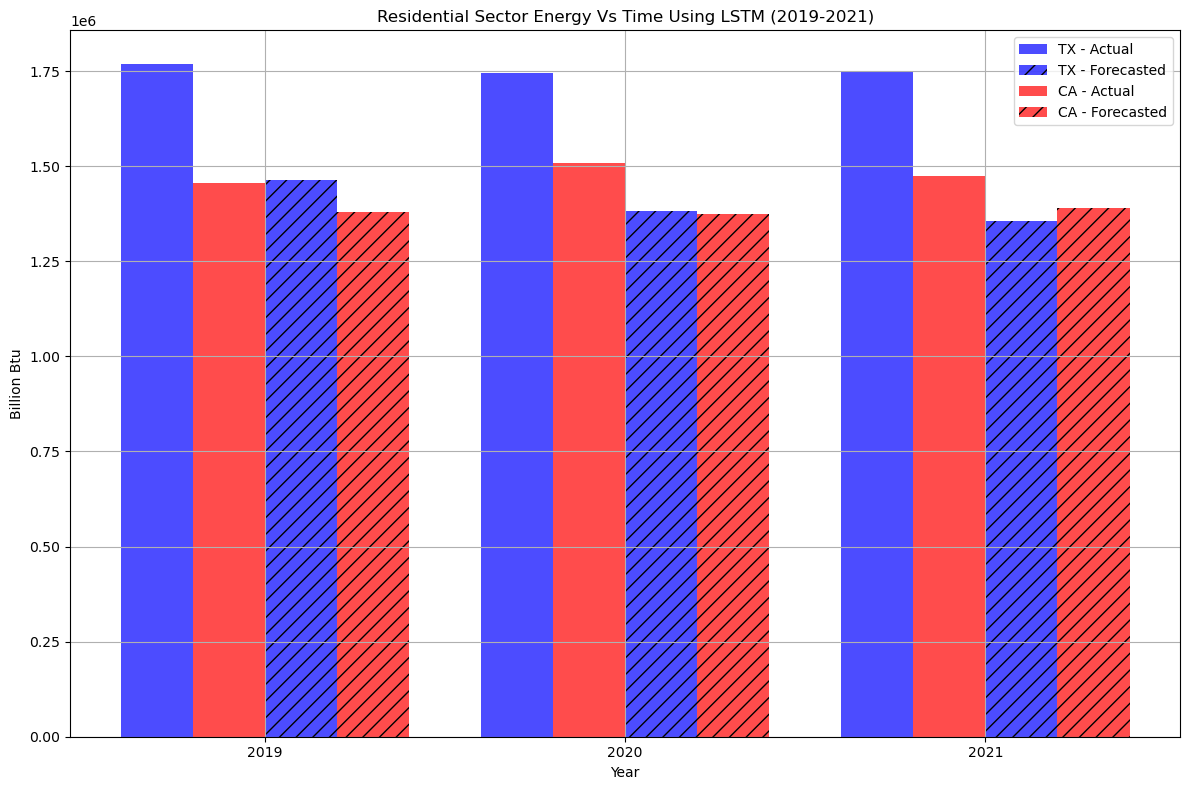

In [9]:
# list of state abbreviations to plot
state_abbreviations =  ['TX','CA']

# Use iloc to get the required years (2019 to 2021) from the end
selected_years = Residential_T_60.iloc[-3:]
years_forecast = selected_years

# Set the width of the bars
bar_width = 0.2

# colors for each state
state_colors = {'TX': 'blue', 'CA': 'red'}

# Create the bar plot for the actual and forecasted values
plt.figure(figsize=(12, 8))

for i, state in enumerate(state_abbreviations):
    # Calculate the x positions for the bars, introducing an offset for each state
    x_positions_actual = np.arange(len(selected_years.index)) + i * bar_width
    x_positions_forecasted = np.arange(len(years_forecast)) + (len(state_abbreviations) + i) * bar_width

    # Use the color assigned to the state for both actual and forecasted bars
    plt.bar(x_positions_actual, selected_years[state], label=f"{state} - Actual", width=bar_width, color=state_colors[state], alpha=0.7)
    plt.bar(x_positions_forecasted, state_predictions_lstm[state].values(), bar_width,
            label=f"{state} - Forecasted", hatch='//', color=state_colors[state], alpha=0.7)
# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Residential Sector Energy Vs Time Using LSTM (2019-2021)')
# Add legend
plt.legend()

# Set x-axis ticks and labels
combined_years = np.arange(len(selected_years.index)) + (len(state_abbreviations) - 0.5) * bar_width
plt.xticks(combined_years, selected_years.index)  

# Add grid
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()

In [5]:
# sequence length and accuracy threshold
sequence_length_lstm = 55
accuracy_threshold_lstm = 0.01 

# Loop through each selected state
state_mse_lstm = {}
state_rmse_lstm = {}
state_forecasts_lstm = {}
state_predictions_lstm = {}  

for state in ['TX','CA']:
    # Extract the data for the selected state
    data = Residential.loc[state].values
    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))
    # Create sequences for LSTM
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_lstm):
        seq = scaled_data[i:i + sequence_length_lstm]
        target = scaled_data[i + sequence_length_lstm]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)
    # training dataset for sequential learning
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]
    # Create and train an LSTM model
    model_lstm = Sequential()
    model_lstm.add(LSTM(units=50, activation='relu', input_shape=(sequence_length_lstm, 1)))
    model_lstm.add(Dense(units=1))
    model_lstm.compile(optimizer='adam', loss='mean_squared_error')

    # Lists to store forecasts
    forecasts_lstm = []
    # Lists to store actual values
    actual_values_lstm = []
    # Lists to store predictions
    predictions_lstm = []

    # Iterate through the forecast years
    current_sequence_lstm = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
        actual_value_lstm = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_lstm.reshape(1, sequence_length_lstm, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_lstm)
        mse_lstm = mean_squared_error([actual_value_lstm], [forecast_lstm[0]])
        model_lstm.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_lstm[0])

        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_lstm > accuracy_threshold_lstm:
            continue
        else:
            forecasts_lstm.append(forecast_lstm[0])
            actual_values_lstm.append(actual_value_lstm)
            # Store the prediction for the current year
            prediction_lstm = scaler.inverse_transform(forecast_lstm.reshape(-1, 1))[0][0]
            predictions_lstm.append(prediction_lstm)

    # Inverse transform the forecasts and actual values to the original scale
    forecasts_lstm = scaler.inverse_transform(np.array(forecasts_lstm).reshape(-1, 1))
    actual_values_lstm = scaler.inverse_transform(np.array(actual_values_lstm).reshape(-1, 1))

    # Calculate the MSE
    mse_lstm = mean_squared_error(actual_values_lstm, forecasts_lstm)

    # Calculate the RMSE
    rmse_lstm = np.sqrt(mse_lstm)
    state_mse_lstm[state] = mse_lstm
    state_rmse_lstm[state] = rmse_lstm

    # Forecast for 2023
    forecast_2022_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2022_lstm[0])
    # Forecast for 2023
    forecast_2023_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_lstm = scaler.inverse_transform(forecast_2022_lstm.reshape(-1, 1))[0][0]
    forecast_2023_lstm = scaler.inverse_transform(forecast_2023_lstm.reshape(-1, 1))[0][0]
    state_forecasts_lstm[state] = {'2022': forecast_2022_lstm, '2023': forecast_2023_lstm}

    # Forecast and Store predictions for 2019
    forecast_2019_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2019_lstm[0])
    # Forecast and Store predictions for 2020
    forecast_2020_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2020_lstm[0])
    # Forecast and Store predictions for 2021
    forecast_2021_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2021_lstm[0])

    # Inverse transform the predictions for 2019
    prediction_2019_lstm = scaler.inverse_transform(forecast_2019_lstm.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2020
    prediction_2020_lstm = scaler.inverse_transform(forecast_2020_lstm.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2021
    prediction_2021_lstm = scaler.inverse_transform(forecast_2021_lstm.reshape(-1, 1))[0][0]
    state_predictions_lstm[state] = {'2019': prediction_2019_lstm, '2020': prediction_2020_lstm, '2021': prediction_2021_lstm}

# Print MSE for selected states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_lstm.items():
    print(f"MSE for {state} (LSTM): {mse_value:.2f}")    
# Print RMSE for selected states
print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_lstm.items():
    print(f"RMSE for {state} (LSTM): {rmse_value:.2f}")

# Print forecasts for selected states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_lstm.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_lstm.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year
state_accuracies_lstm = {}
for state in state_predictions_lstm:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Residential.loc[state].loc[int(year)]
        predicted_value = state_predictions_lstm[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_lstm[state] = accuracies_state

# Print accuracies for each state and year
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States:")
for state, accuracies_state in state_accuracies_lstm.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 0s 259ms/step
Epoch 1/20
8/8 [==============================] - 3s 18ms/step - loss: 0.8636
Epoch 2/20
8/8 [==============================] - 0s 17ms/step - loss: 0.5839
Epoch 3/20
8/8 [==============================] - 0s 15ms/step - loss: 0.3505
Epoch 4/20
8/8 [==============================] - 0s 20ms/step - loss: 0.1444
Epoch 5/20
8/8 [==============================] - 0s 17ms/step - loss: 0.1683
Epoch 6/20
8/8 [==============================] - 0s 16ms/step - loss: 0.1446
Epoch 7/20
8/8 [==============================] - 0s 21ms/step - loss: 0.1279
Epoch 8/20
8/8 [==============================] - 0s 22ms/step - loss: 0.1135
Epoch 9/20
8/8 [==============================] - 0s 29ms/step - loss: 0.1043
Epoch 10/20
8/8 [==============================] - 0s 17ms/step - loss: 0.1008
Epoch 11/20
8/8 [==============================] - 0s 31ms/step - loss: 0.1065
Epoch 12/20
8/8 [==============================] - 0s 15ms/step - loss: 0.0960
Epoch 13

17/17 [==============================] - 0s 14ms/step - loss: 0.0347
Epoch 19/20
17/17 [==============================] - 0s 16ms/step - loss: 0.0309
Epoch 20/20
1/1 [==============================] - 0s 36ms/step
Epoch 1/20
18/18 [==============================] - 0s 19ms/step - loss: 0.0338
Epoch 2/20
18/18 [==============================] - 0s 15ms/step - loss: 0.0311
Epoch 3/20
18/18 [==============================] - 0s 15ms/step - loss: 0.0318
Epoch 4/20
18/18 [==============================] - 0s 16ms/step - loss: 0.0309
Epoch 5/20
18/18 [==============================] - 0s 20ms/step - loss: 0.0381
Epoch 6/20
18/18 [==============================] - 0s 16ms/step - loss: 0.0292
Epoch 7/20
18/18 [==============================] - 0s 18ms/step - loss: 0.0310
Epoch 8/20
18/18 [==============================] - 0s 15ms/step - loss: 0.0303
Epoch 9/20
18/18 [==============================] - 0s 16ms/step - loss: 0.0355
Epoch 10/20
18/18 [==============================] - 0s 17ms/step 

27/27 [==============================] - 0s 16ms/step - loss: 0.0199
Epoch 15/20
27/27 [==============================] - 0s 15ms/step - loss: 0.0194
Epoch 16/20
27/27 [==============================] - 0s 17ms/step - loss: 0.0175
Epoch 17/20
27/27 [==============================] - 0s 18ms/step - loss: 0.0272
Epoch 18/20
27/27 [==============================] - 0s 17ms/step - loss: 0.0261
Epoch 19/20
27/27 [==============================] - 0s 16ms/step - loss: 0.0248
Epoch 20/20
1/1 [==============================] - 0s 65ms/step
Epoch 1/20
28/28 [==============================] - 1s 19ms/step - loss: 0.0253
Epoch 2/20
28/28 [==============================] - 1s 18ms/step - loss: 0.0231
Epoch 3/20
28/28 [==============================] - 0s 17ms/step - loss: 0.0221
Epoch 4/20
28/28 [==============================] - 0s 15ms/step - loss: 0.0183
Epoch 5/20
28/28 [==============================] - 0s 16ms/step - loss: 0.0210
Epoch 6/20
28/28 [==============================] - 0s 16ms/st

37/37 [==============================] - 0s 13ms/step - loss: 0.0189
Epoch 11/20
37/37 [==============================] - 0s 13ms/step - loss: 0.0193
Epoch 12/20
37/37 [==============================] - 1s 14ms/step - loss: 0.0217
Epoch 13/20
37/37 [==============================] - 1s 16ms/step - loss: 0.0198
Epoch 14/20
37/37 [==============================] - 1s 17ms/step - loss: 0.0213
Epoch 15/20
37/37 [==============================] - 1s 16ms/step - loss: 0.0193
Epoch 16/20
37/37 [==============================] - 1s 14ms/step - loss: 0.0185
Epoch 17/20
37/37 [==============================] - 1s 17ms/step - loss: 0.0194
Epoch 18/20
37/37 [==============================] - 0s 13ms/step - loss: 0.0190
Epoch 19/20
37/37 [==============================] - 1s 17ms/step - loss: 0.0169
Epoch 20/20
1/1 [==============================] - 0s 18ms/step
Epoch 1/20
38/38 [==============================] - 1s 13ms/step - loss: 0.0190
Epoch 2/20
38/38 [==============================] - 1s 15m

47/47 [==============================] - 1s 17ms/step - loss: 0.0151
Epoch 7/20
47/47 [==============================] - 1s 17ms/step - loss: 0.0146
Epoch 8/20
47/47 [==============================] - 0s 11ms/step - loss: 0.0154
Epoch 9/20
47/47 [==============================] - 1s 11ms/step - loss: 0.0146
Epoch 10/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0151
Epoch 11/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0156
Epoch 12/20
47/47 [==============================] - 0s 10ms/step - loss: 0.0150
Epoch 13/20
47/47 [==============================] - 1s 15ms/step - loss: 0.0149
Epoch 14/20
47/47 [==============================] - 1s 12ms/step - loss: 0.0147
Epoch 15/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0162
Epoch 16/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0152
Epoch 17/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0149
Epoch 18/20
47/47 [=============================

Epoch 4/20
57/57 [==============================] - 1s 11ms/step - loss: 0.0116
Epoch 5/20
57/57 [==============================] - 1s 15ms/step - loss: 0.0112
Epoch 6/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0110
Epoch 7/20
57/57 [==============================] - 1s 12ms/step - loss: 0.0117
Epoch 8/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0106
Epoch 9/20
57/57 [==============================] - 1s 12ms/step - loss: 0.0108
Epoch 10/20
57/57 [==============================] - 1s 14ms/step - loss: 0.0089
Epoch 11/20
57/57 [==============================] - 1s 10ms/step - loss: 0.0085
Epoch 12/20
57/57 [==============================] - 1s 11ms/step - loss: 0.0085
Epoch 13/20
57/57 [==============================] - 1s 10ms/step - loss: 0.0083
Epoch 14/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0080
Epoch 15/20
57/57 [==============================] - 1s 11ms/step - loss: 0.0082
Epoch 16/20
57/57 [==================

1/1 [==============================] - 0s 31ms/step
Epoch 1/20
12/12 [==============================] - 0s 10ms/step - loss: 0.0300
Epoch 2/20
12/12 [==============================] - 0s 9ms/step - loss: 0.0319
Epoch 3/20
12/12 [==============================] - 0s 9ms/step - loss: 0.0292
Epoch 4/20
12/12 [==============================] - 0s 9ms/step - loss: 0.0297
Epoch 5/20
12/12 [==============================] - 0s 9ms/step - loss: 0.0293
Epoch 6/20
12/12 [==============================] - 0s 9ms/step - loss: 0.0280
Epoch 7/20
12/12 [==============================] - 0s 9ms/step - loss: 0.0290
Epoch 8/20
12/12 [==============================] - 0s 9ms/step - loss: 0.0326
Epoch 9/20
12/12 [==============================] - 0s 9ms/step - loss: 0.0283
Epoch 10/20
12/12 [==============================] - 0s 9ms/step - loss: 0.0284
Epoch 11/20
12/12 [==============================] - 0s 9ms/step - loss: 0.0310
Epoch 12/20
12/12 [==============================] - 0s 9ms/step - loss: 0.0

21/21 [==============================] - 0s 9ms/step - loss: 0.0157
Epoch 19/20
21/21 [==============================] - 0s 9ms/step - loss: 0.0162
Epoch 20/20
1/1 [==============================] - 0s 31ms/step
Epoch 1/20
22/22 [==============================] - 0s 9ms/step - loss: 0.0150
Epoch 2/20
22/22 [==============================] - 0s 9ms/step - loss: 0.0164
Epoch 3/20
22/22 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 4/20
22/22 [==============================] - 0s 10ms/step - loss: 0.0145
Epoch 5/20
22/22 [==============================] - 0s 9ms/step - loss: 0.0150
Epoch 6/20
22/22 [==============================] - 0s 9ms/step - loss: 0.0148
Epoch 7/20
22/22 [==============================] - 0s 10ms/step - loss: 0.0145
Epoch 8/20
22/22 [==============================] - 0s 10ms/step - loss: 0.0145
Epoch 9/20
22/22 [==============================] - 0s 8ms/step - loss: 0.0159
Epoch 10/20
22/22 [==============================] - 0s 8ms/step - loss: 0

31/31 [==============================] - 0s 8ms/step - loss: 0.0107
Epoch 16/20
31/31 [==============================] - 0s 8ms/step - loss: 0.0096
Epoch 17/20
31/31 [==============================] - 0s 9ms/step - loss: 0.0102
Epoch 18/20
31/31 [==============================] - 0s 8ms/step - loss: 0.0096
Epoch 19/20
31/31 [==============================] - 0s 8ms/step - loss: 0.0095
Epoch 20/20
1/1 [==============================] - 0s 33ms/step
Epoch 1/20
32/32 [==============================] - 0s 12ms/step - loss: 0.0095
Epoch 2/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0094
Epoch 3/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0102
Epoch 4/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 5/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 6/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0120
Epoch 7/20
32/32 [==============================] - 0s 9ms/step - loss: 0

Epoch 13/20
41/41 [==============================] - 1s 18ms/step - loss: 0.0070
Epoch 14/20
41/41 [==============================] - 1s 13ms/step - loss: 0.0095
Epoch 15/20
41/41 [==============================] - 1s 16ms/step - loss: 0.0093
Epoch 16/20
41/41 [==============================] - 0s 10ms/step - loss: 0.0089
Epoch 17/20
41/41 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 18/20
41/41 [==============================] - 1s 15ms/step - loss: 0.0080
Epoch 19/20
41/41 [==============================] - 1s 17ms/step - loss: 0.0086
Epoch 20/20
1/1 [==============================] - 0s 49ms/step
Epoch 1/20
42/42 [==============================] - 1s 15ms/step - loss: 0.0076
Epoch 2/20
42/42 [==============================] - 1s 17ms/step - loss: 0.0073
Epoch 3/20
42/42 [==============================] - 1s 16ms/step - loss: 0.0079
Epoch 4/20
42/42 [==============================] - 1s 13ms/step - loss: 0.0074
Epoch 5/20
42/42 [==============================] 

46/46 [==============================] - 0s 9ms/step - loss: 0.0078
Epoch 13/20
46/46 [==============================] - 0s 9ms/step - loss: 0.0081
Epoch 14/20
46/46 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 15/20
46/46 [==============================] - 0s 9ms/step - loss: 0.0082
Epoch 16/20
46/46 [==============================] - 0s 9ms/step - loss: 0.0077
Epoch 17/20
46/46 [==============================] - 0s 9ms/step - loss: 0.0071
Epoch 18/20
46/46 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 19/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0072
Epoch 20/20
1/1 [==============================] - 0s 65ms/step
Epoch 1/20
47/47 [==============================] - 1s 13ms/step - loss: 0.0080
Epoch 2/20
47/47 [==============================] - 1s 13ms/step - loss: 0.0073
Epoch 3/20
47/47 [==============================] - 1s 12ms/step - loss: 0.0076
Epoch 4/20
47/47 [==============================] - 1s 13ms/step - l

56/56 [==============================] - 0s 8ms/step - loss: 0.0057
Epoch 11/20
56/56 [==============================] - 0s 8ms/step - loss: 0.0057
Epoch 12/20
56/56 [==============================] - 0s 8ms/step - loss: 0.0060
Epoch 13/20
56/56 [==============================] - 0s 8ms/step - loss: 0.0056
Epoch 14/20
56/56 [==============================] - 1s 9ms/step - loss: 0.0058
Epoch 15/20
56/56 [==============================] - 0s 8ms/step - loss: 0.0067
Epoch 16/20
56/56 [==============================] - 1s 10ms/step - loss: 0.0064
Epoch 17/20
56/56 [==============================] - 0s 9ms/step - loss: 0.0063
Epoch 18/20
56/56 [==============================] - 0s 8ms/step - loss: 0.0058
Epoch 19/20
56/56 [==============================] - 0s 7ms/step - loss: 0.0059
Epoch 20/20
1/1 [==============================] - 0s 16ms/step
Epoch 1/20
57/57 [==============================] - 0s 8ms/step - loss: 0.0064
Epoch 2/20
57/57 [==============================] - 1s 9ms/step - lo

### GRU

In [10]:
# sequence length and accuracy threshold
sequence_length_gru = 40
accuracy_threshold_gru = 0.01  

# Loop through each selected state
state_mse_gru = {}
state_rmse_gru = {}
state_forecasts_gru = {}
state_predictions_gru = {} 

for state in ['TX','CA']:
    # Extract the data for the selected state
    data = Residential.loc[state].values

    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))

    # Create sequences for GRU
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_gru):
        seq = scaled_data[i:i + sequence_length_gru]
        target = scaled_data[i + sequence_length_gru]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)

    # Include training data
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]

    # Create and train a GRU model
    model_gru = Sequential()
    model_gru.add(GRU(units=50, activation='relu', input_shape=(sequence_length_gru, 1)))
    model_gru.add(Dense(units=1))
    model_gru.compile(optimizer='adam', loss='mean_squared_error')

    # Lists to store forecasts, actual values, and predictions
    forecasts_gru = []
    actual_values_gru = []
    predictions_gru = []

    # Iterate through the forecast years
    current_sequence_gru = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
        actual_value_gru = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_gru.reshape(1, sequence_length_gru, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_gru)
        mse_gru = mean_squared_error([actual_value_gru], [forecast_gru[0]])
        model_gru.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_gru = np.append(current_sequence_gru[1:], forecast_gru[0])

        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_gru > accuracy_threshold_gru:
            continue
        else:
            forecasts_gru.append(forecast_gru[0])
            actual_values_gru.append(actual_value_gru)

            # Store the prediction for the current year
            prediction_gru = scaler.inverse_transform(forecast_gru.reshape(-1, 1))[0][0]
            predictions_gru.append(prediction_gru)

    # Inverse transform the forecasts and actual values to the original scale
    forecasts_gru = scaler.inverse_transform(np.array(forecasts_gru).reshape(-1, 1))
    actual_values_gru = scaler.inverse_transform(np.array(actual_values_gru).reshape(-1, 1))

    # Calculate the mean squared error (MSE) for the forecasts
    mse_gru = mean_squared_error(actual_values_gru, forecasts_gru)

    # Calculate the root mean squared error (RMSE)
    rmse_gru = np.sqrt(mse_gru)

    state_mse_gru[state] = mse_gru
    state_rmse_gru[state] = rmse_gru

    # Forecast for 2022 and 2023
    forecast_2022_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2022_gru[0])
    forecast_2023_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_gru = scaler.inverse_transform(forecast_2022_gru.reshape(-1, 1))[0][0]
    forecast_2023_gru = scaler.inverse_transform(forecast_2023_gru.reshape(-1, 1))[0][0]
    state_forecasts_gru[state] = {'2022': forecast_2022_gru, '2023': forecast_2023_gru}

    # Store predictions for 2019, 2020, and 2021
    forecast_2019_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2019_gru[0])
    forecast_2020_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2020_gru[0])
    forecast_2021_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2021_gru[0])

    # Inverse transform the predictions to the original scale
    prediction_2019_gru = scaler.inverse_transform(forecast_2019_gru.reshape(-1, 1))[0][0]
    prediction_2020_gru = scaler.inverse_transform(forecast_2020_gru.reshape(-1, 1))[0][0]
    prediction_2021_gru = scaler.inverse_transform(forecast_2021_gru.reshape(-1, 1))[0][0]
    state_predictions_gru[state] = {'2019': prediction_2019_gru, '2020': prediction_2020_gru, '2021': prediction_2021_gru}

# Print MSE and RMSE for all states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_gru.items():
    print(f"MSE for {state} (GRU): {mse_value:.2f}")

print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_gru.items():
    print(f"RMSE for {state} (GRU): {rmse_value:.2f}")

# Print forecasts for all states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_gru.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_gru.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year for GRU
state_accuracies_gru = {}

for state in state_predictions_gru:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Residential.loc[state].loc[int(year)]
        predicted_value = state_predictions_gru[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_gru[state] = accuracies_state

# Print accuracies for each state and year for GRU
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States (GRU):")
for state, accuracies_state in state_accuracies_gru.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 0s 352ms/step
Epoch 1/20
23/23 [==============================] - 3s 16ms/step - loss: 0.6909
Epoch 2/20
23/23 [==============================] - 0s 17ms/step - loss: 0.2826
Epoch 3/20
23/23 [==============================] - 0s 19ms/step - loss: 0.0446
Epoch 4/20
23/23 [==============================] - 0s 20ms/step - loss: 0.0185
Epoch 5/20
23/23 [==============================] - 0s 17ms/step - loss: 0.0149
Epoch 6/20
23/23 [==============================] - 0s 16ms/step - loss: 0.0148
Epoch 7/20
23/23 [==============================] - 0s 15ms/step - loss: 0.0150
Epoch 8/20
23/23 [==============================] - 0s 18ms/step - loss: 0.0146
Epoch 9/20
23/23 [==============================] - 0s 17ms/step - loss: 0.0142
Epoch 10/20
23/23 [==============================] - 0s 18ms/step - loss: 0.0139
Epoch 11/20
23/23 [==============================] - 0s 22ms/step - loss: 0.0139
Epoch 12/20
23/23 [==============================] - 0s 19ms/step

32/32 [==============================] - 0s 12ms/step - loss: 0.0106
Epoch 18/20
32/32 [==============================] - 0s 12ms/step - loss: 0.0108
Epoch 19/20
32/32 [==============================] - 0s 12ms/step - loss: 0.0110
Epoch 20/20
1/1 [==============================] - 0s 39ms/step
Epoch 1/20
33/33 [==============================] - 0s 13ms/step - loss: 0.0105
Epoch 2/20
33/33 [==============================] - 0s 12ms/step - loss: 0.0113
Epoch 3/20
33/33 [==============================] - 0s 11ms/step - loss: 0.0108
Epoch 4/20
33/33 [==============================] - 0s 10ms/step - loss: 0.0111
Epoch 5/20
33/33 [==============================] - 0s 10ms/step - loss: 0.0102
Epoch 6/20
33/33 [==============================] - 0s 12ms/step - loss: 0.0093
Epoch 7/20
33/33 [==============================] - 0s 12ms/step - loss: 0.0116
Epoch 8/20
33/33 [==============================] - 0s 13ms/step - loss: 0.0104
Epoch 9/20
33/33 [==============================] - 0s 12ms/step 

42/42 [==============================] - 1s 12ms/step - loss: 0.0078
Epoch 14/20
42/42 [==============================] - 1s 14ms/step - loss: 0.0081
Epoch 15/20
42/42 [==============================] - 1s 12ms/step - loss: 0.0078
Epoch 16/20
42/42 [==============================] - 0s 12ms/step - loss: 0.0078
Epoch 17/20
42/42 [==============================] - 1s 13ms/step - loss: 0.0080
Epoch 18/20
42/42 [==============================] - 1s 15ms/step - loss: 0.0076
Epoch 19/20
42/42 [==============================] - 0s 12ms/step - loss: 0.0083
Epoch 20/20
1/1 [==============================] - 0s 94ms/step
Epoch 1/20
43/43 [==============================] - 1s 15ms/step - loss: 0.0079
Epoch 2/20
43/43 [==============================] - 1s 15ms/step - loss: 0.0079
Epoch 3/20
43/43 [==============================] - 1s 15ms/step - loss: 0.0079
Epoch 4/20
43/43 [==============================] - 1s 15ms/step - loss: 0.0081
Epoch 5/20
43/43 [==============================] - 1s 14ms/s

52/52 [==============================] - 1s 13ms/step - loss: 0.0062
Epoch 10/20
52/52 [==============================] - 1s 16ms/step - loss: 0.0065
Epoch 11/20
52/52 [==============================] - 1s 15ms/step - loss: 0.0067
Epoch 12/20
52/52 [==============================] - 1s 15ms/step - loss: 0.0067
Epoch 13/20
52/52 [==============================] - 1s 16ms/step - loss: 0.0064
Epoch 14/20
52/52 [==============================] - 1s 16ms/step - loss: 0.0073
Epoch 15/20
52/52 [==============================] - 1s 15ms/step - loss: 0.0064
Epoch 16/20
52/52 [==============================] - 1s 15ms/step - loss: 0.0063
Epoch 17/20
52/52 [==============================] - 1s 15ms/step - loss: 0.0063
Epoch 18/20
52/52 [==============================] - 1s 16ms/step - loss: 0.0065
Epoch 19/20
52/52 [==============================] - 1s 14ms/step - loss: 0.0061
Epoch 20/20
1/1 [==============================] - 0s 184ms/step
Epoch 1/20
53/53 [==============================] - 1s 1

62/62 [==============================] - 1s 15ms/step - loss: 0.0052
Epoch 6/20
62/62 [==============================] - 1s 18ms/step - loss: 0.0050
Epoch 7/20
62/62 [==============================] - 1s 16ms/step - loss: 0.0049
Epoch 8/20
62/62 [==============================] - 1s 13ms/step - loss: 0.0051
Epoch 9/20
62/62 [==============================] - 1s 15ms/step - loss: 0.0051
Epoch 10/20
62/62 [==============================] - 1s 16ms/step - loss: 0.0048
Epoch 11/20
62/62 [==============================] - 1s 16ms/step - loss: 0.0049
Epoch 12/20
62/62 [==============================] - 1s 15ms/step - loss: 0.0051
Epoch 13/20
62/62 [==============================] - 1s 15ms/step - loss: 0.0055
Epoch 14/20
62/62 [==============================] - 1s 15ms/step - loss: 0.0048
Epoch 15/20
62/62 [==============================] - 1s 11ms/step - loss: 0.0052
Epoch 16/20
62/62 [==============================] - 1s 12ms/step - loss: 0.0049
Epoch 17/20
62/62 [=========================

1/1 [==============================] - 0s 330ms/step
Epoch 1/20
27/27 [==============================] - 1s 31ms/step - loss: 0.0048
Epoch 2/20
27/27 [==============================] - 1s 22ms/step - loss: 0.0047
Epoch 3/20
27/27 [==============================] - 1s 27ms/step - loss: 0.0042
Epoch 4/20
27/27 [==============================] - 1s 33ms/step - loss: 0.0044
Epoch 5/20
27/27 [==============================] - 1s 32ms/step - loss: 0.0054
Epoch 6/20
27/27 [==============================] - 1s 25ms/step - loss: 0.0045
Epoch 7/20
27/27 [==============================] - 1s 25ms/step - loss: 0.0052
Epoch 8/20
27/27 [==============================] - 1s 19ms/step - loss: 0.0050
Epoch 9/20
27/27 [==============================] - 1s 26ms/step - loss: 0.0055
Epoch 10/20
27/27 [==============================] - 1s 21ms/step - loss: 0.0047
Epoch 11/20
27/27 [==============================] - 1s 19ms/step - loss: 0.0065
Epoch 12/20
27/27 [==============================] - 1s 19ms/step

36/36 [==============================] - 1s 24ms/step - loss: 0.0042
Epoch 18/20
36/36 [==============================] - 1s 29ms/step - loss: 0.0046
Epoch 19/20
36/36 [==============================] - 1s 20ms/step - loss: 0.0039
Epoch 20/20
1/1 [==============================] - 0s 99ms/step
Epoch 1/20
37/37 [==============================] - 1s 18ms/step - loss: 0.0039
Epoch 2/20
37/37 [==============================] - 1s 18ms/step - loss: 0.0043
Epoch 3/20
37/37 [==============================] - 1s 21ms/step - loss: 0.0042
Epoch 4/20
37/37 [==============================] - 1s 24ms/step - loss: 0.0040
Epoch 5/20
37/37 [==============================] - 1s 30ms/step - loss: 0.0042
Epoch 6/20
37/37 [==============================] - 1s 22ms/step - loss: 0.0044
Epoch 7/20
37/37 [==============================] - 1s 23ms/step - loss: 0.0041
Epoch 8/20
37/37 [==============================] - 1s 30ms/step - loss: 0.0041
Epoch 9/20
37/37 [==============================] - 1s 20ms/step 

46/46 [==============================] - 1s 20ms/step - loss: 0.0035
Epoch 14/20
46/46 [==============================] - 1s 19ms/step - loss: 0.0037
Epoch 15/20
46/46 [==============================] - 1s 23ms/step - loss: 0.0035
Epoch 16/20
46/46 [==============================] - 1s 22ms/step - loss: 0.0038
Epoch 17/20
46/46 [==============================] - 1s 19ms/step - loss: 0.0039
Epoch 18/20
46/46 [==============================] - 1s 16ms/step - loss: 0.0036
Epoch 19/20
46/46 [==============================] - 1s 20ms/step - loss: 0.0036
Epoch 20/20
1/1 [==============================] - 0s 204ms/step
Epoch 1/20
47/47 [==============================] - 1s 24ms/step - loss: 0.0038
Epoch 2/20
47/47 [==============================] - 1s 19ms/step - loss: 0.0037
Epoch 3/20
47/47 [==============================] - 1s 21ms/step - loss: 0.0036
Epoch 4/20
47/47 [==============================] - 1s 17ms/step - loss: 0.0037
Epoch 5/20
47/47 [==============================] - 1s 17ms/

62/62 [==============================] - 1s 23ms/step - loss: 0.0035
Epoch 6/20
62/62 [==============================] - 1s 21ms/step - loss: 0.0035
Epoch 7/20
62/62 [==============================] - 1s 23ms/step - loss: 0.0038
Epoch 8/20
62/62 [==============================] - 2s 25ms/step - loss: 0.0035
Epoch 9/20
62/62 [==============================] - 1s 24ms/step - loss: 0.0036
Epoch 10/20
62/62 [==============================] - 2s 25ms/step - loss: 0.0035
Epoch 11/20
62/62 [==============================] - 1s 21ms/step - loss: 0.0036
Epoch 12/20
62/62 [==============================] - 1s 22ms/step - loss: 0.0037
Epoch 13/20
62/62 [==============================] - 2s 25ms/step - loss: 0.0034
Epoch 14/20
62/62 [==============================] - 1s 24ms/step - loss: 0.0034
Epoch 15/20
62/62 [==============================] - 1s 23ms/step - loss: 0.0036
Epoch 16/20
62/62 [==============================] - 1s 23ms/step - loss: 0.0036
Epoch 17/20
62/62 [=========================

In [6]:
# sequence length and accuracy threshold
sequence_length_gru = 55
accuracy_threshold_gru = 0.01  

# Loop through each selected state
state_mse_gru = {}
state_rmse_gru = {}
state_forecasts_gru = {}
state_predictions_gru = {}  

for state in ['CA','TX']:
    # Extract the data for the selected state
    data = Residential.loc[state].values
    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))
    # Create sequences for GRU
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_gru):
        seq = scaled_data[i:i + sequence_length_gru]
        target = scaled_data[i + sequence_length_gru]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)
    # training dataset for sequential learning
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]
    # Create and train a GRU model
    model_gru = Sequential()
    model_gru.add(GRU(units=50, activation='relu', input_shape=(sequence_length_gru, 1)))
    model_gru.add(Dense(units=1))
    model_gru.compile(optimizer='adam', loss='mean_squared_error')
    # Lists to store forecast
    forecasts_gru = []
    # Lists to store actual values
    actual_values_gru = []
    # Lists to store predictions
    predictions_gru = []
    # Iterate through the forecast years
    current_sequence_gru = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
        actual_value_gru = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_gru.reshape(1, sequence_length_gru, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_gru)
        mse_gru = mean_squared_error([actual_value_gru], [forecast_gru[0]])
        model_gru.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_gru = np.append(current_sequence_gru[1:], forecast_gru[0])
        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_gru > accuracy_threshold_gru:
            continue
        else:
            forecasts_gru.append(forecast_gru[0])
            actual_values_gru.append(actual_value_gru)
            # Store the prediction for the current year
            prediction_gru = scaler.inverse_transform(forecast_gru.reshape(-1, 1))[0][0]
            predictions_gru.append(prediction_gru)
    # Inverse transform the forecasts and actual values to the original scale
    forecasts_gru = scaler.inverse_transform(np.array(forecasts_gru).reshape(-1, 1))
    actual_values_gru = scaler.inverse_transform(np.array(actual_values_gru).reshape(-1, 1))
    # Calculate the MSE
    mse_gru = mean_squared_error(actual_values_gru, forecasts_gru)
    # Calculate the RMSE
    rmse_gru = np.sqrt(mse_gru)
    state_mse_gru[state] = mse_gru
    state_rmse_gru[state] = rmse_gru

    # Forecast for 2022 and 2023
    forecast_2022_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2022_gru[0])
    forecast_2023_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_gru = scaler.inverse_transform(forecast_2022_gru.reshape(-1, 1))[0][0]
    forecast_2023_gru = scaler.inverse_transform(forecast_2023_gru.reshape(-1, 1))[0][0]
    # Store predictions for 2022 and 2023
    state_forecasts_gru[state] = {'2022': forecast_2022_gru, '2023': forecast_2023_gru}

    # Forecast and Store predictions for 2019
    forecast_2019_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2019_gru[0])
    # Forecast and Store predictions for 2020
    forecast_2020_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2020_gru[0])
    # Forecast and Store predictions for 2021
    forecast_2021_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2021_gru[0])

    # Inverse transform the predictions for 2019
    prediction_2019_gru = scaler.inverse_transform(forecast_2019_gru.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2020
    prediction_2020_gru = scaler.inverse_transform(forecast_2020_gru.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2021
    prediction_2021_gru = scaler.inverse_transform(forecast_2021_gru.reshape(-1, 1))[0][0]
    state_predictions_gru[state] = {'2019': prediction_2019_gru, '2020': prediction_2020_gru, '2021': prediction_2021_gru}

# Print MSE for selected states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_gru.items():
    print(f"MSE for {state} (GRU): {mse_value:.2f}")
    
# Print RMSE for selected states
print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_gru.items():
    print(f"RMSE for {state} (GRU): {rmse_value:.2f}")

# Print forecasts for selected states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_gru.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_gru.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year for GRU
state_accuracies_gru = {}

for state in state_predictions_gru:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Residential.loc[state].loc[int(year)]
        predicted_value = state_predictions_gru[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_gru[state] = accuracies_state

# Print accuracies for each state and year for GRU
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States (GRU):")
for state, accuracies_state in state_accuracies_gru.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 0s 157ms/step
Epoch 1/20
8/8 [==============================] - 1s 9ms/step - loss: 1.0065
Epoch 2/20
8/8 [==============================] - 0s 13ms/step - loss: 0.7859
Epoch 3/20
8/8 [==============================] - 0s 10ms/step - loss: 0.6148
Epoch 4/20
8/8 [==============================] - 0s 9ms/step - loss: 0.4801
Epoch 5/20
8/8 [==============================] - 0s 9ms/step - loss: 0.3823
Epoch 6/20
8/8 [==============================] - 0s 9ms/step - loss: 0.2820
Epoch 7/20
8/8 [==============================] - 0s 9ms/step - loss: 0.1824
Epoch 8/20
8/8 [==============================] - 0s 10ms/step - loss: 0.0836
Epoch 9/20
8/8 [==============================] - 0s 10ms/step - loss: 0.0435
Epoch 10/20
8/8 [==============================] - 0s 14ms/step - loss: 0.0478
Epoch 11/20
8/8 [==============================] - 0s 11ms/step - loss: 0.0376
Epoch 12/20
8/8 [==============================] - 0s 11ms/step - loss: 0.0374
Epoch 13/20
8

1/1 [==============================] - 0s 18ms/step
Epoch 1/20
13/13 [==============================] - 0s 8ms/step - loss: 0.0238
Epoch 2/20
13/13 [==============================] - 0s 9ms/step - loss: 0.0234
Epoch 3/20
13/13 [==============================] - 0s 8ms/step - loss: 0.0236
Epoch 4/20
13/13 [==============================] - 0s 9ms/step - loss: 0.0259
Epoch 5/20
13/13 [==============================] - 0s 8ms/step - loss: 0.0236
Epoch 6/20
13/13 [==============================] - 0s 8ms/step - loss: 0.0231
Epoch 7/20
13/13 [==============================] - 0s 8ms/step - loss: 0.0238
Epoch 8/20
13/13 [==============================] - 0s 8ms/step - loss: 0.0231
Epoch 9/20
13/13 [==============================] - 0s 7ms/step - loss: 0.0241
Epoch 10/20
13/13 [==============================] - 0s 8ms/step - loss: 0.0266
Epoch 11/20
13/13 [==============================] - 0s 8ms/step - loss: 0.0243
Epoch 12/20
13/13 [==============================] - 0s 7ms/step - loss: 0.02

22/22 [==============================] - 0s 8ms/step - loss: 0.0150
Epoch 20/20
1/1 [==============================] - 0s 19ms/step
Epoch 1/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0136
Epoch 2/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0146
Epoch 3/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0144
Epoch 4/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0137
Epoch 5/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0133
Epoch 6/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0136
Epoch 7/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0142
Epoch 8/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0143
Epoch 9/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0133
Epoch 10/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0144
Epoch 11/20
23/23 [==============================] - 0s 8ms/step - loss: 0.01

32/32 [==============================] - 0s 8ms/step - loss: 0.0109
Epoch 18/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0114
Epoch 19/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0106
Epoch 20/20
1/1 [==============================] - 0s 20ms/step
Epoch 1/20
33/33 [==============================] - 0s 8ms/step - loss: 0.0101
Epoch 2/20
33/33 [==============================] - 0s 8ms/step - loss: 0.0103
Epoch 3/20
33/33 [==============================] - 0s 8ms/step - loss: 0.0128
Epoch 4/20
33/33 [==============================] - 0s 8ms/step - loss: 0.0110
Epoch 5/20
33/33 [==============================] - 0s 8ms/step - loss: 0.0105
Epoch 6/20
33/33 [==============================] - 0s 8ms/step - loss: 0.0100
Epoch 7/20
33/33 [==============================] - 0s 8ms/step - loss: 0.0101
Epoch 8/20
33/33 [==============================] - 0s 8ms/step - loss: 0.0104
Epoch 9/20
33/33 [==============================] - 0s 8ms/step - loss: 0.01

42/42 [==============================] - 0s 8ms/step - loss: 0.0070
Epoch 16/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0078
Epoch 17/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0080
Epoch 18/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0072
Epoch 19/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0068
Epoch 20/20
1/1 [==============================] - 0s 19ms/step
Epoch 1/20
43/43 [==============================] - 0s 7ms/step - loss: 0.0064
Epoch 2/20
43/43 [==============================] - 0s 8ms/step - loss: 0.0090
Epoch 3/20
43/43 [==============================] - 0s 8ms/step - loss: 0.0074
Epoch 4/20
43/43 [==============================] - 0s 8ms/step - loss: 0.0075
Epoch 5/20
43/43 [==============================] - 0s 8ms/step - loss: 0.0085
Epoch 6/20
43/43 [==============================] - 0s 8ms/step - loss: 0.0082
Epoch 7/20
43/43 [==============================] - 0s 8ms/step - loss: 0.

52/52 [==============================] - 0s 9ms/step - loss: 0.0061
Epoch 14/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0055
Epoch 15/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0064
Epoch 16/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0057
Epoch 17/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0057
Epoch 18/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0070
Epoch 19/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0065
Epoch 20/20
1/1 [==============================] - 0s 18ms/step
Epoch 1/20
53/53 [==============================] - 0s 8ms/step - loss: 0.0059
Epoch 2/20
53/53 [==============================] - 0s 8ms/step - loss: 0.0061
Epoch 3/20
53/53 [==============================] - 0s 8ms/step - loss: 0.0057
Epoch 4/20
53/53 [==============================] - 0s 8ms/step - loss: 0.0062
Epoch 5/20
53/53 [==============================] - 0s 8ms/step - loss: 

62/62 [==============================] - 0s 8ms/step - loss: 0.0056
Epoch 12/20
62/62 [==============================] - 0s 8ms/step - loss: 0.0056
Epoch 13/20
62/62 [==============================] - 0s 8ms/step - loss: 0.0062
Epoch 14/20
62/62 [==============================] - 0s 8ms/step - loss: 0.0064
Epoch 15/20
62/62 [==============================] - 0s 8ms/step - loss: 0.0052
Epoch 16/20
62/62 [==============================] - 1s 8ms/step - loss: 0.0070
Epoch 17/20
62/62 [==============================] - 1s 8ms/step - loss: 0.0073
Epoch 18/20
62/62 [==============================] - 0s 8ms/step - loss: 0.0072
Epoch 19/20
62/62 [==============================] - 0s 8ms/step - loss: 0.0065
Epoch 20/20
1/1 [==============================] - 0s 149ms/step
Epoch 1/20
8/8 [==============================] - 1s 10ms/step - loss: 0.7934
Epoch 2/20
8/8 [==============================] - 0s 8ms/step - loss: 0.6121
Epoch 3/20
8/8 [==============================] - 0s 9ms/step - loss: 0.

17/17 [==============================] - 0s 9ms/step - loss: 0.0425
Epoch 8/20
17/17 [==============================] - 0s 8ms/step - loss: 0.0396
Epoch 9/20
17/17 [==============================] - 0s 9ms/step - loss: 0.0415
Epoch 10/20
17/17 [==============================] - 0s 9ms/step - loss: 0.0412
Epoch 11/20
17/17 [==============================] - 0s 9ms/step - loss: 0.0393
Epoch 12/20
17/17 [==============================] - 0s 8ms/step - loss: 0.0403
Epoch 13/20
17/17 [==============================] - 0s 9ms/step - loss: 0.0402
Epoch 14/20
17/17 [==============================] - 0s 9ms/step - loss: 0.0394
Epoch 15/20
17/17 [==============================] - 0s 8ms/step - loss: 0.0404
Epoch 16/20
17/17 [==============================] - 0s 9ms/step - loss: 0.0393
Epoch 17/20
17/17 [==============================] - 0s 9ms/step - loss: 0.0423
Epoch 18/20
17/17 [==============================] - 0s 9ms/step - loss: 0.0427
Epoch 19/20
17/17 [==============================] - 0

27/27 [==============================] - 0s 8ms/step - loss: 0.0260
Epoch 6/20
27/27 [==============================] - 0s 10ms/step - loss: 0.0249
Epoch 7/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0263
Epoch 8/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0246
Epoch 9/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0266
Epoch 10/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0266
Epoch 11/20
27/27 [==============================] - 0s 11ms/step - loss: 0.0248
Epoch 12/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0265
Epoch 13/20
27/27 [==============================] - 0s 9ms/step - loss: 0.0270
Epoch 14/20
27/27 [==============================] - 0s 10ms/step - loss: 0.0258
Epoch 15/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0257
Epoch 16/20
27/27 [==============================] - 0s 11ms/step - loss: 0.0256
Epoch 17/20
27/27 [==============================] -

37/37 [==============================] - 0s 8ms/step - loss: 0.0191
Epoch 4/20
37/37 [==============================] - 0s 7ms/step - loss: 0.0192
Epoch 5/20
37/37 [==============================] - 0s 7ms/step - loss: 0.0183
Epoch 6/20
37/37 [==============================] - 0s 7ms/step - loss: 0.0196
Epoch 7/20
37/37 [==============================] - 0s 7ms/step - loss: 0.0186
Epoch 8/20
37/37 [==============================] - 0s 7ms/step - loss: 0.0186
Epoch 9/20
37/37 [==============================] - 0s 8ms/step - loss: 0.0193
Epoch 10/20
37/37 [==============================] - 0s 7ms/step - loss: 0.0184
Epoch 11/20
37/37 [==============================] - 0s 7ms/step - loss: 0.0190
Epoch 12/20
37/37 [==============================] - 0s 8ms/step - loss: 0.0189
Epoch 13/20
37/37 [==============================] - 0s 7ms/step - loss: 0.0183
Epoch 14/20
37/37 [==============================] - 0s 8ms/step - loss: 0.0185
Epoch 15/20
37/37 [==============================] - 0s 7m

47/47 [==============================] - 0s 8ms/step - loss: 0.0148
Epoch 2/20
47/47 [==============================] - 0s 7ms/step - loss: 0.0147
Epoch 3/20
47/47 [==============================] - 0s 7ms/step - loss: 0.0151
Epoch 4/20
47/47 [==============================] - 0s 7ms/step - loss: 0.0146
Epoch 5/20
47/47 [==============================] - 0s 7ms/step - loss: 0.0147
Epoch 6/20
47/47 [==============================] - 0s 8ms/step - loss: 0.0149
Epoch 7/20
47/47 [==============================] - 0s 7ms/step - loss: 0.0144
Epoch 8/20
47/47 [==============================] - 0s 8ms/step - loss: 0.0147
Epoch 9/20
47/47 [==============================] - 0s 7ms/step - loss: 0.0156
Epoch 10/20
47/47 [==============================] - 0s 8ms/step - loss: 0.0145
Epoch 11/20
47/47 [==============================] - 0s 7ms/step - loss: 0.0152
Epoch 12/20
47/47 [==============================] - 0s 7ms/step - loss: 0.0145
Epoch 13/20
47/47 [==============================] - 0s 7ms/

1/1 [==============================] - 0s 21ms/step
Epoch 1/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0105
Epoch 2/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0107
Epoch 3/20
57/57 [==============================] - 0s 8ms/step - loss: 0.0113
Epoch 4/20
57/57 [==============================] - 0s 8ms/step - loss: 0.0116
Epoch 5/20
57/57 [==============================] - 0s 7ms/step - loss: 0.0108
Epoch 6/20
57/57 [==============================] - 0s 8ms/step - loss: 0.0122
Epoch 7/20
57/57 [==============================] - 0s 8ms/step - loss: 0.0122
Epoch 8/20
57/57 [==============================] - 0s 8ms/step - loss: 0.0110
Epoch 9/20
57/57 [==============================] - 0s 8ms/step - loss: 0.0110
Epoch 10/20
57/57 [==============================] - 0s 8ms/step - loss: 0.0109
Epoch 11/20
57/57 [==============================] - 0s 8ms/step - loss: 0.0110
Epoch 12/20
57/57 [==============================] - 0s 8ms/step - loss: 0.01

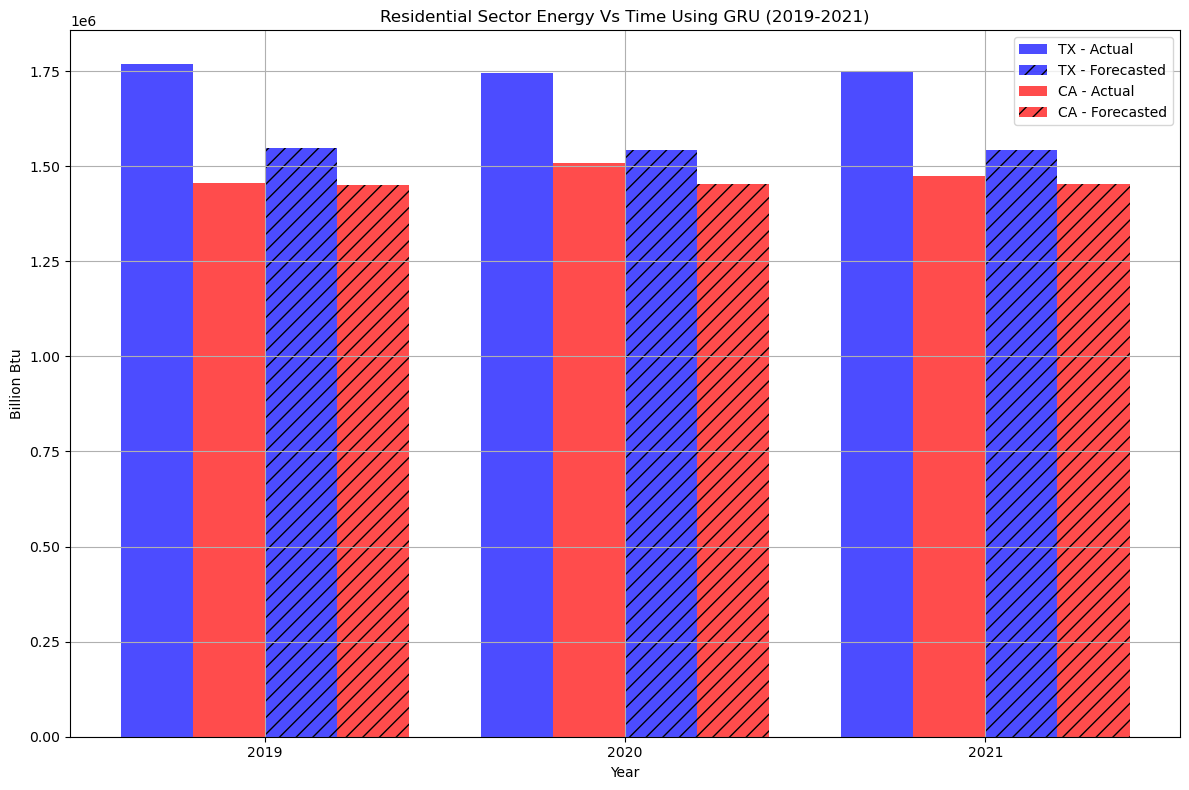

In [12]:
# list of state abbreviations to plot
state_abbreviations =  ['TX','CA']

# Use iloc to get the required years (2019 to 2021) from the end
selected_years = Residential_T_60.iloc[-3:]
years_forecast = selected_years

# Set the width of the bars
bar_width = 0.2

# colors for each state
state_colors = {'TX': 'blue', 'CA': 'red'}

# Create the bar plot for the actual and forecasted values
plt.figure(figsize=(12, 8))

for i, state in enumerate(state_abbreviations):
    # Calculate the x positions for the bars, introducing an offset for each state
    x_positions_actual = np.arange(len(selected_years.index)) + i * bar_width
    x_positions_forecasted = np.arange(len(years_forecast)) + (len(state_abbreviations) + i) * bar_width

    # Use the color assigned to the state for both actual and forecasted bars
    plt.bar(x_positions_actual, selected_years[state], label=f"{state} - Actual", width=bar_width, color=state_colors[state], alpha=0.7)
    plt.bar(x_positions_forecasted, state_predictions_gru[state].values(), bar_width,
            label=f"{state} - Forecasted", hatch='//', color=state_colors[state], alpha=0.7)
# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Residential Sector Energy Vs Time Using GRU (2019-2021)')
# Add legend
plt.legend()

# Set x-axis ticks and labels
combined_years = np.arange(len(selected_years.index)) + (len(state_abbreviations) - 0.5) * bar_width
plt.xticks(combined_years, selected_years.index)  

# Add grid
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()

### CNN

In [13]:
# sequence length and accuracy threshold
sequence_length_cnn = 40
accuracy_threshold_cnn = 0.01  

# Loop through each selected state
state_mse_cnn = {}
state_rmse_cnn = {}
state_forecasts_cnn = {}
state_predictions_cnn = {}  

for state in ['TX','CA']:
    # Extract the data for the selected state
    data = Residential.loc[state].values

    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))

    # Create sequences for CNN
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_cnn):
        seq = scaled_data[i:i + sequence_length_cnn]
        target = scaled_data[i + sequence_length_cnn]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)

    # Include training data
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]

    # Create and train a CNN model
    model_cnn = Sequential()
    model_cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(sequence_length_cnn, 1)))
    model_cnn.add(MaxPooling1D(pool_size=2))
    model_cnn.add(Flatten())
    model_cnn.add(Dense(units=50, activation='relu'))
    model_cnn.add(Dense(units=1))
    model_cnn.compile(optimizer='adam', loss='mean_squared_error')

    # Lists to store forecasts, actual values, and predictions
    forecasts_cnn = []
    actual_values_cnn = []
    predictions_cnn = []

    # Iterate through the forecast years
    current_sequence_cnn = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
        actual_value_cnn = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_cnn.reshape(1, sequence_length_cnn, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_cnn)
        mse_cnn = mean_squared_error([actual_value_cnn], [forecast_cnn[0]])
        model_cnn.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_cnn[0])

        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_cnn > accuracy_threshold_cnn:
            continue
        else:
            forecasts_cnn.append(forecast_cnn[0])
            actual_values_cnn.append(actual_value_cnn)

            # Store the prediction for the current year
            prediction_cnn = scaler.inverse_transform(forecast_cnn.reshape(-1, 1))[0][0]
            predictions_cnn.append(prediction_cnn)

    # Inverse transform the forecasts and actual values to the original scale
    forecasts_cnn = scaler.inverse_transform(np.array(forecasts_cnn).reshape(-1, 1))
    actual_values_cnn = scaler.inverse_transform(np.array(actual_values_cnn).reshape(-1, 1))

    # Calculate the mean squared error (MSE) for the forecasts
    mse_cnn = mean_squared_error(actual_values_cnn, forecasts_cnn)

    # Calculate the root mean squared error (RMSE)
    rmse_cnn = np.sqrt(mse_cnn)
    state_mse_cnn[state] = mse_cnn
    state_rmse_cnn[state] = rmse_cnn

    # Forecast for 2022 and 2023
    forecast_2022_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2022_cnn[0])
    forecast_2023_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_cnn = scaler.inverse_transform(forecast_2022_cnn.reshape(-1, 1))[0][0]
    forecast_2023_cnn = scaler.inverse_transform(forecast_2023_cnn.reshape(-1, 1))[0][0]
    state_forecasts_cnn[state] = {'2022': forecast_2022_cnn, '2023': forecast_2023_cnn}

    # Store predictions for 2019, 2020, and 2021
    forecast_2019_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2019_cnn[0])
    forecast_2020_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2020_cnn[0])
    forecast_2021_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2021_cnn[0])

    # Inverse transform the predictions to the original scale
    prediction_2019_cnn = scaler.inverse_transform(forecast_2019_cnn.reshape(-1, 1))[0][0]
    prediction_2020_cnn = scaler.inverse_transform(forecast_2020_cnn.reshape(-1, 1))[0][0]
    prediction_2021_cnn = scaler.inverse_transform(forecast_2021_cnn.reshape(-1, 1))[0][0]
    state_predictions_cnn[state] = {'2019': prediction_2019_cnn, '2020': prediction_2020_cnn, '2021': prediction_2021_cnn}

# Print MSE and RMSE for all states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_cnn.items():
    print(f"MSE for {state} (CNN): {mse_value:.2f}")

print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_cnn.items():
    print(f"RMSE for {state} (CNN): {rmse_value:.2f}")

# Print forecasts for all states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_cnn.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_cnn.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year for CNN
state_accuracies_cnn = {}

for state in state_predictions_cnn:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Residential.loc[state].loc[int(year)]
        predicted_value = state_predictions_cnn[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_cnn[state] = accuracies_state

# Print accuracies for each state and year for CNN
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States (CNN):")
for state, accuracies_state in state_accuracies_cnn.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 0s 404ms/step
Epoch 1/20
23/23 [==============================] - 3s 7ms/step - loss: 0.1627
Epoch 2/20
23/23 [==============================] - 0s 11ms/step - loss: 0.0311
Epoch 3/20
23/23 [==============================] - 0s 11ms/step - loss: 0.0237
Epoch 4/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0290
Epoch 5/20
23/23 [==============================] - 0s 12ms/step - loss: 0.0254
Epoch 6/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0198
Epoch 7/20
23/23 [==============================] - 0s 11ms/step - loss: 0.0186
Epoch 8/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0331
Epoch 9/20
23/23 [==============================] - 0s 7ms/step - loss: 0.0180
Epoch 10/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0183
Epoch 11/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0208
Epoch 12/20
23/23 [==============================] - 0s 10ms/step - l

32/32 [==============================] - 0s 5ms/step - loss: 0.0061
Epoch 19/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0072
Epoch 20/20
1/1 [==============================] - 0s 90ms/step
Epoch 1/20
33/33 [==============================] - 0s 5ms/step - loss: 0.0072
Epoch 2/20
33/33 [==============================] - 0s 4ms/step - loss: 0.0076
Epoch 3/20
33/33 [==============================] - 0s 5ms/step - loss: 0.0068
Epoch 4/20
33/33 [==============================] - 0s 4ms/step - loss: 0.0066
Epoch 5/20
33/33 [==============================] - 0s 5ms/step - loss: 0.0064
Epoch 6/20
33/33 [==============================] - 0s 5ms/step - loss: 0.0061
Epoch 7/20
33/33 [==============================] - 0s 6ms/step - loss: 0.0062
Epoch 8/20
33/33 [==============================] - 0s 5ms/step - loss: 0.0066
Epoch 9/20
33/33 [==============================] - 0s 5ms/step - loss: 0.0064
Epoch 10/20
33/33 [==============================] - 0s 7ms/step - loss: 0.00

42/42 [==============================] - 0s 5ms/step - loss: 0.0042
Epoch 17/20
42/42 [==============================] - 0s 6ms/step - loss: 0.0048
Epoch 18/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0045
Epoch 19/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0046
Epoch 20/20
1/1 [==============================] - 0s 88ms/step
Epoch 1/20
43/43 [==============================] - 0s 4ms/step - loss: 0.0043
Epoch 2/20
43/43 [==============================] - 0s 6ms/step - loss: 0.0045
Epoch 3/20
43/43 [==============================] - 0s 4ms/step - loss: 0.0053
Epoch 4/20
43/43 [==============================] - 0s 6ms/step - loss: 0.0057
Epoch 5/20
43/43 [==============================] - 0s 5ms/step - loss: 0.0053
Epoch 6/20
43/43 [==============================] - 0s 4ms/step - loss: 0.0067
Epoch 7/20
43/43 [==============================] - 0s 4ms/step - loss: 0.0054
Epoch 8/20
43/43 [==============================] - 0s 5ms/step - loss: 0.0

52/52 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 15/20
52/52 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 16/20
52/52 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 17/20
52/52 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 18/20
52/52 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 19/20
52/52 [==============================] - 0s 6ms/step - loss: 0.0035
Epoch 20/20
1/1 [==============================] - 0s 60ms/step
Epoch 1/20
53/53 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 2/20
53/53 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 3/20
53/53 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 4/20
53/53 [==============================] - 0s 6ms/step - loss: 0.0035
Epoch 5/20
53/53 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 6/20
53/53 [==============================] - 0s 7ms/step - loss: 0

62/62 [==============================] - 0s 4ms/step - loss: 0.0030
Epoch 13/20
62/62 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 14/20
62/62 [==============================] - 0s 7ms/step - loss: 0.0031
Epoch 15/20
62/62 [==============================] - 0s 7ms/step - loss: 0.0033
Epoch 16/20
62/62 [==============================] - 0s 5ms/step - loss: 0.0030
Epoch 17/20
62/62 [==============================] - 0s 7ms/step - loss: 0.0031
Epoch 18/20
62/62 [==============================] - 0s 5ms/step - loss: 0.0029
Epoch 19/20
62/62 [==============================] - 0s 8ms/step - loss: 0.0027
Epoch 20/20
1/1 [==============================] - 0s 288ms/step
Epoch 1/20
23/23 [==============================] - 4s 4ms/step - loss: 0.0893
Epoch 2/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0169
Epoch 3/20
23/23 [==============================] - 0s 7ms/step - loss: 0.0138
Epoch 4/20
23/23 [==============================] - 0s 4ms/step - loss

32/32 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 8/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0024
Epoch 9/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0030
Epoch 10/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 11/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 12/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 13/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 14/20
32/32 [==============================] - 0s 7ms/step - loss: 0.0027
Epoch 15/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0019
Epoch 16/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0025
Epoch 17/20
32/32 [==============================] - 0s 7ms/step - loss: 0.0026
Epoch 18/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 19/20
32/32 [==============================] - 0

42/42 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 6/20
42/42 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 7/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 8/20
42/42 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 9/20
42/42 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 10/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 11/20
42/42 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 12/20
42/42 [==============================] - 0s 4ms/step - loss: 0.0018
Epoch 13/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 14/20
42/42 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 15/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 16/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 17/20
42/42 [==============================] - 0s 

52/52 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 4/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 5/20
52/52 [==============================] - 0s 4ms/step - loss: 0.0010
Epoch 6/20
52/52 [==============================] - 0s 5ms/step - loss: 0.0012
Epoch 7/20
52/52 [==============================] - 0s 5ms/step - loss: 9.8170e-04
Epoch 8/20
52/52 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 9/20
52/52 [==============================] - 0s 4ms/step - loss: 9.1072e-04
Epoch 10/20
52/52 [==============================] - 0s 6ms/step - loss: 9.5067e-04
Epoch 11/20
52/52 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 12/20
52/52 [==============================] - 0s 4ms/step - loss: 9.9667e-04
Epoch 13/20
52/52 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 14/20
52/52 [==============================] - 0s 4ms/step - loss: 0.0017
Epoch 15/20
52/52 [=======================

61/61 [==============================] - 0s 6ms/step - loss: 7.9692e-04
Epoch 19/20
61/61 [==============================] - 0s 6ms/step - loss: 7.9279e-04
Epoch 20/20
1/1 [==============================] - 0s 67ms/step
Epoch 1/20
62/62 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 2/20
62/62 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 3/20
62/62 [==============================] - 0s 4ms/step - loss: 0.0010
Epoch 4/20
62/62 [==============================] - 0s 3ms/step - loss: 9.1507e-04
Epoch 5/20
62/62 [==============================] - 0s 4ms/step - loss: 9.3179e-04
Epoch 6/20
62/62 [==============================] - 0s 4ms/step - loss: 9.3510e-04
Epoch 7/20
62/62 [==============================] - 0s 4ms/step - loss: 8.6206e-04
Epoch 8/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 9/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 10/20
62/62 [==============================] - 

In [7]:
# sequence length and accuracy threshold
sequence_length_cnn = 40
accuracy_threshold_cnn = 0.01  

# Loop through each selected state
state_mse_cnn = {}
state_rmse_cnn = {}
state_forecasts_cnn = {}
state_predictions_cnn = {} 

for state in ['CA','TX']:
    # Extract the data for the selected state
    data = Residential.loc[state].values
    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))
    # Create sequences for CNN
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_cnn):
        seq = scaled_data[i:i + sequence_length_cnn]
        target = scaled_data[i + sequence_length_cnn]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)
    # training dataset for sequential learning
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]
    # Create and train a CNN model
    model_cnn = Sequential()
    model_cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(sequence_length_cnn, 1)))
    model_cnn.add(MaxPooling1D(pool_size=2))
    model_cnn.add(Flatten())
    model_cnn.add(Dense(units=50, activation='relu'))
    model_cnn.add(Dense(units=1))
    model_cnn.compile(optimizer='adam', loss='mean_squared_error')
    # Lists to store forecasts, actual values, and predictions
    forecasts_cnn = []
    actual_values_cnn = []
    predictions_cnn = []
    # Iterate through the forecast years
    current_sequence_cnn = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
        actual_value_cnn = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_cnn.reshape(1, sequence_length_cnn, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_cnn)
        mse_cnn = mean_squared_error([actual_value_cnn], [forecast_cnn[0]])
        model_cnn.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_cnn[0])
        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_cnn > accuracy_threshold_cnn:
            continue
        else:
            forecasts_cnn.append(forecast_cnn[0])
            actual_values_cnn.append(actual_value_cnn)
            # Store the prediction for the current year
            prediction_cnn = scaler.inverse_transform(forecast_cnn.reshape(-1, 1))[0][0]
            predictions_cnn.append(prediction_cnn)
    # Inverse transform the forecasts and actual values to the original scale
    forecasts_cnn = scaler.inverse_transform(np.array(forecasts_cnn).reshape(-1, 1))
    actual_values_cnn = scaler.inverse_transform(np.array(actual_values_cnn).reshape(-1, 1))
    # Calculate the MSE
    mse_cnn = mean_squared_error(actual_values_cnn, forecasts_cnn)
    # Calculate the RMSE
    rmse_cnn = np.sqrt(mse_cnn)
    state_mse_cnn[state] = mse_cnn
    state_rmse_cnn[state] = rmse_cnn
    # Forecast for 2022
    forecast_2022_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2022_cnn[0])
    
    # Forecast for 2023
    forecast_2023_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    # Inverse transform the forecasts to the original scale for 2022
    forecast_2022_cnn = scaler.inverse_transform(forecast_2022_cnn.reshape(-1, 1))[0][0]
    # Inverse transform the forecasts to the original scale for 2023
    forecast_2023_cnn = scaler.inverse_transform(forecast_2023_cnn.reshape(-1, 1))[0][0]
    state_forecasts_cnn[state] = {'2022': forecast_2022_cnn, '2023': forecast_2023_cnn}
    
    # Store predictions for 2019
    forecast_2019_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2019_cnn[0])
    # Store predictions for 2020
    forecast_2020_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2020_cnn[0])
    # Store predictions for 2021
    forecast_2021_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2021_cnn[0])
    # Inverse transform the predictions to the original scale for 2019
    prediction_2019_cnn = scaler.inverse_transform(forecast_2019_cnn.reshape(-1, 1))[0][0]
    # Inverse transform the predictions to the original scale for 2020
    prediction_2020_cnn = scaler.inverse_transform(forecast_2020_cnn.reshape(-1, 1))[0][0]
    # Inverse transform the predictions to the original scale for 2021
    prediction_2021_cnn = scaler.inverse_transform(forecast_2021_cnn.reshape(-1, 1))[0][0]
    # store the values for 2019,2020 and 2021
    state_predictions_cnn[state] = {'2019': prediction_2019_cnn, '2020': prediction_2020_cnn, '2021': prediction_2021_cnn}

    # Print MSE for selected states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_cnn.items():
    print(f"MSE for {state} (CNN): {mse_value:.2f}") 
# Print RMSE for selected states
print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_cnn.items():
    print(f"RMSE for {state} (CNN): {rmse_value:.2f}")
# Print forecasts for selected states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_cnn.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")
# Print predictions for 2019, 2020, and 2021 for selected states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_cnn.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")
# Calculate and store accuracy for each state and year for CNN
state_accuracies_cnn = {}
for state in state_predictions_cnn:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Residential.loc[state].loc[int(year)]
        predicted_value = state_predictions_cnn[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_cnn[state] = accuracies_state
# Print accuracies for each state and year for CNN
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States (CNN):")
for state, accuracies_state in state_accuracies_cnn.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 0s 193ms/step
Epoch 1/20
23/23 [==============================] - 3s 2ms/step - loss: 0.0968
Epoch 2/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0233
Epoch 3/20
23/23 [==============================] - 0s 2ms/step - loss: 0.0189
Epoch 4/20
23/23 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 5/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0146
Epoch 6/20
23/23 [==============================] - 0s 2ms/step - loss: 0.0103
Epoch 7/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0113
Epoch 8/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0079
Epoch 9/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0128
Epoch 10/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0093
Epoch 11/20
23/23 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 12/20
23/23 [==============================] - 0s 2ms/step - loss: 0.0

32/32 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 20/20
1/1 [==============================] - 0s 18ms/step
Epoch 1/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 2/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 3/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 4/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 5/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 6/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 7/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 8/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 9/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 10/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 11/20
33/33 [==============================] - 0s 3ms/step - loss: 0.00

42/42 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 18/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 19/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 20/20
1/1 [==============================] - 0s 20ms/step
Epoch 1/20
43/43 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 2/20
43/43 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 3/20
43/43 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 4/20
43/43 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 5/20
43/43 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 6/20
43/43 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 7/20
43/43 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 8/20
43/43 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 9/20
43/43 [==============================] - 0s 2ms/step - loss: 0.00

52/52 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 16/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 17/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 18/20
52/52 [==============================] - 0s 3ms/step - loss: 9.7159e-04
Epoch 19/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 20/20
1/1 [==============================] - 0s 19ms/step
Epoch 1/20
53/53 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 2/20
53/53 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 3/20
53/53 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 4/20
53/53 [==============================] - 0s 2ms/step - loss: 9.8261e-04
Epoch 5/20
53/53 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 6/20
53/53 [==============================] - 0s 2ms/step - loss: 9.6403e-04
Epoch 7/20
53/53 [==============================] - 0s 2ms/ste

62/62 [==============================] - 0s 3ms/step - loss: 7.8188e-04
Epoch 8/20
62/62 [==============================] - 0s 3ms/step - loss: 6.8127e-04
Epoch 9/20
62/62 [==============================] - 0s 3ms/step - loss: 7.0982e-04
Epoch 10/20
62/62 [==============================] - 0s 2ms/step - loss: 6.6519e-04
Epoch 11/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 12/20
62/62 [==============================] - 0s 2ms/step - loss: 8.7400e-04
Epoch 13/20
62/62 [==============================] - 0s 2ms/step - loss: 9.4977e-04
Epoch 14/20
62/62 [==============================] - 0s 2ms/step - loss: 9.4304e-04
Epoch 15/20
62/62 [==============================] - 0s 2ms/step - loss: 8.3618e-04
Epoch 16/20
62/62 [==============================] - 0s 3ms/step - loss: 7.1519e-04
Epoch 17/20
62/62 [==============================] - 0s 2ms/step - loss: 6.9725e-04
Epoch 18/20
62/62 [==============================] - 0s 2ms/step - loss: 8.2895e-04
Epoch 19/2

32/32 [==============================] - 0s 2ms/step - loss: 0.0145
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0115
Epoch 3/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0100
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0116
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0084
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0078
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0080
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 11/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0076
Epoch 12/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0082
Epoch 13/20
32/32 [==============================] - 0s 3ms/

1/1 [==============================] - 0s 16ms/step
Epoch 1/20
42/42 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 2/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 3/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 4/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 5/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 6/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 7/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 8/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 9/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 10/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 11/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 12/20
42/42 [==============================] - 0s 2ms/step - loss: 0.00

51/51 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 19/20
51/51 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 20/20
1/1 [==============================] - 0s 16ms/step
Epoch 1/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 2/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 3/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 4/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 5/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 6/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 7/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 8/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 9/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 10/20
52/52 [==============================] - 0s 1ms/step - loss: 0.00

61/61 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 17/20
61/61 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 18/20
61/61 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 19/20
61/61 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 20/20
1/1 [==============================] - 0s 28ms/step
Epoch 1/20
62/62 [==============================] - 0s 1ms/step - loss: 0.0056
Epoch 2/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 3/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 4/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 5/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 6/20
62/62 [==============================] - 0s 1ms/step - loss: 0.0033
Epoch 7/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 8/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0

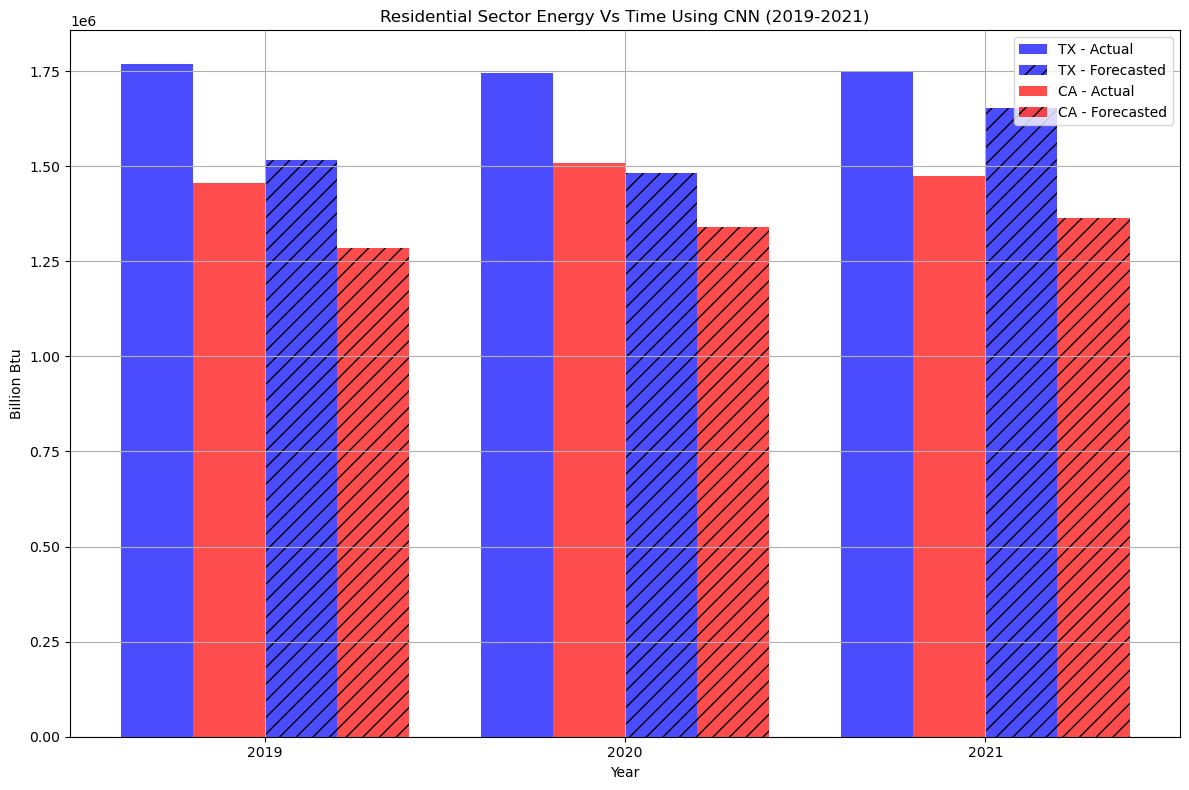

In [14]:
# list of state abbreviations to plot
state_abbreviations =  ['TX','CA']

# Use iloc to get the required years (2019 to 2021) from the end
selected_years = Residential_T_60.iloc[-3:]
years_forecast = selected_years

# Set the width of the bars
bar_width = 0.2

# colors for each state
state_colors = {'TX': 'blue', 'CA': 'red'}

# Create the bar plot for the actual and forecasted values
plt.figure(figsize=(12, 8))

for i, state in enumerate(state_abbreviations):
    # Calculate the x positions for the bars, introducing an offset for each state
    x_positions_actual = np.arange(len(selected_years.index)) + i * bar_width
    x_positions_forecasted = np.arange(len(years_forecast)) + (len(state_abbreviations) + i) * bar_width

    # Use the color assigned to the state for both actual and forecasted bars
    plt.bar(x_positions_actual, selected_years[state], label=f"{state} - Actual", width=bar_width, color=state_colors[state], alpha=0.7)
    plt.bar(x_positions_forecasted, state_predictions_cnn[state].values(), bar_width,
            label=f"{state} - Forecasted", hatch='//', color=state_colors[state], alpha=0.7)
# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Residential Sector Energy Vs Time Using CNN (2019-2021)')
# Add legend
plt.legend()

# Set x-axis ticks and labels
combined_years = np.arange(len(selected_years.index)) + (len(state_abbreviations) - 0.5) * bar_width
plt.xticks(combined_years, selected_years.index)  

# Add grid
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()

## Machine Learning Forecasting

### ARIMA

In [8]:
# Function to perform ARIMA forecast
def arima_forecast(state_data, state_name, order=(5, 1, 0), forecast_steps=2):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(state_data.reshape(-1, 1))
    
    train_size = int(len(scaled_data) * 0.8)
    train, test = scaled_data[:train_size], scaled_data[train_size:]
    
    model = ARIMA(train, order=order)
    fit_model = model.fit()
    
    forecast_values_arima = fit_model.forecast(steps=len(scaled_data) - train_size + forecast_steps)
    forecast_values_arima = scaler.inverse_transform(forecast_values_arima.reshape(-1, 1))
    
    mse_arima = mean_squared_error(state_data[train_size:], forecast_values_arima[:len(state_data) - train_size])
    rmse_arima = np.sqrt(mse_arima)
    
    forecast_years_arima = forecast_values_arima[:len(state_data)]
    
    return mse_arima, rmse_arima, forecast_years_arima

# Selected states
selected_states = ['TX','CA']

# Dictionaries to store results
mse_arima_dict = {}
rmse_arima_dict = {}
forecast_years_arima_dict = {}
accuracy_arima_dict = {}

# Loop through each selected state for ARIMA
for state in selected_states:
    state_data = Residential.loc[state].values
    mse_arima, rmse_arima, forecast_years_arima = arima_forecast(state_data, state, order=(5, 1, 0), forecast_steps=2)
    
    mse_arima_dict[state] = mse_arima
    rmse_arima_dict[state] = rmse_arima
    forecast_years_arima_dict[state] = forecast_years_arima
    
    # Calculate accuracy for each year
    actual_data = state_data[-3:]
    forecasted_data = forecast_years_arima[:3]
    
    accuracies = 100 - np.abs((forecasted_data - actual_data) / actual_data) * 100
    
    accuracy_arima_dict[state] = {
        '2019': accuracies[0][0],
        '2020': accuracies[1][0],
        '2021': accuracies[2][0]
    }
    
    # Print the values for each year
    print(f"\n{state} - Actual Values:")
    print(f"2019: {actual_data[0]:.2f}, 2020: {actual_data[1]:.2f}, 2021: {actual_data[2]:.2f}")

    print(f"{state} - Forecasted Values:")
    print(f"2019: {forecasted_data[0][0]:.2f}, 2020: {forecasted_data[1][0]:.2f}, 2021: {forecasted_data[2][0]:.2f}")

    # Print forecast values for 2022 and 2023
    print(f"{state} - Forecasted Values for 2022 and 2023:")
    for year, forecast_value in zip(range(2022, 2024), forecast_years_arima[3:]):
        print(f"{year}: {forecast_value[0]:.2f}")

    # Print the accuracy for each year
    print(f"Accuracy for {state} (ARIMA) - 2019: {accuracy_arima_dict[state]['2019']:.2f}%")
    print(f"Accuracy for {state} (ARIMA) - 2020: {accuracy_arima_dict[state]['2020']:.2f}%")
    print(f"Accuracy for {state} (ARIMA) - 2021: {accuracy_arima_dict[state]['2021']:.2f}")
    print(f"Mean Squared Error (MSE) for {state} (ARIMA): {mse_arima:.2f}")
    print(f"Root Mean Squared Error (RMSE) for {state} (ARIMA): {rmse_arima:.2f}\n")
# Print the forecasted values for 2022 and 2023 for all states
print("\nForecasted Values for 2022 and 2023 (ARIMA):")
for year in range(2022, 2024):
    print(f"Forecasts for {year}:")
    for state in selected_states:
        forecast_value = forecast_years_arima_dict[state][year - 2019][0]
        print(f"{state}: {forecast_value:.2f}")

# Print MSE for all states
print("\nMean Squared Error (MSE) for All states:")
for state, mse_value in mse_arima_dict.items():
    print(f"MSE for {state} (ARIMA): {mse_value:.2f}")

# Print RMSE for all states
print("\nRoot Mean Squared Error (RMSE) for All states:")
for state, rmse_value in rmse_arima_dict.items():
    print(f"RMSE for {state} (ARIMA): {rmse_value:.2f}")



TX - Actual Values:
2019: 1768627.00, 2020: 1745283.00, 2021: 1748371.00
TX - Forecasted Values:
2019: 1601138.43, 2020: 1627040.29, 2021: 1618169.90
TX - Forecasted Values for 2022 and 2023:
2022: 1661022.79
2023: 1670018.71
Accuracy for TX (ARIMA) - 2019: 90.53%
Accuracy for TX (ARIMA) - 2020: 91.99%
Accuracy for TX (ARIMA) - 2021: 91.49
Mean Squared Error (MSE) for TX (ARIMA): 2822841866.52
Root Mean Squared Error (RMSE) for TX (ARIMA): 53130.42


CA - Actual Values:
2019: 1456345.00, 2020: 1508426.00, 2021: 1473203.00
CA - Forecasted Values:
2019: 1503009.95, 2020: 1513367.33, 2021: 1515643.94
CA - Forecasted Values for 2022 and 2023:
2022: 1525222.35
2023: 1527051.19
Accuracy for CA (ARIMA) - 2019: 96.80%
Accuracy for CA (ARIMA) - 2020: 96.08%
Accuracy for CA (ARIMA) - 2021: 95.93
Mean Squared Error (MSE) for CA (ARIMA): 11550859248.01
Root Mean Squared Error (RMSE) for CA (ARIMA): 107474.92


Forecasted Values for 2022 and 2023 (ARIMA):
Forecasts for 2022:
TX: 1661022.79
CA: 152

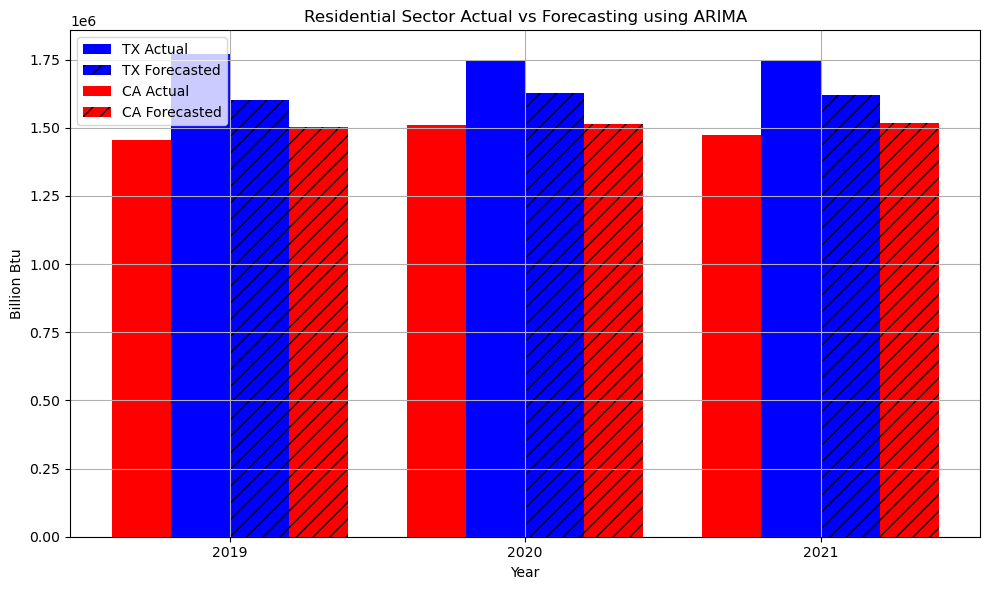

In [10]:
# colors for each state
state_colors = {'TX': 'blue', 'CA': 'red'}

# Create a new figure
plt.figure(figsize=(10, 6))

# width of the bars and the space between bar groups
bar_width = 0.2
space = np.arange(len(range(2019, 2022)))

# Loop through each selected state
for i, state in enumerate(selected_states):
    # Extract actual and forecasted data
    actual_data = Residential.loc[state].values[-3:]
    forecasted_data = np.array(forecast_years_arima_dict[state][:3]).flatten() 

    # Generate x values (years)
    years = range(2019, 2022)

    # Plot actual data with custom color on the left side
    plt.bar(space - bar_width/2 - i*bar_width, actual_data, bar_width, label=f'{state} Actual', color=state_colors[state])

    # Plot forecasted data with hatch pattern and custom color on the right side
    plt.bar(space + bar_width/2 + i*bar_width, forecasted_data, bar_width, label=f'{state} Forecasted', color=state_colors[state], hatch='//')

# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Residential Sector Actual vs Forecasting using ARIMA')

# Add xticks
plt.xticks(space, years)

# Add a legend
plt.legend()

# Add grid
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


## Saving as CSV file.

In [17]:
# Create the initial DataFrame
df_combined_results = pd.DataFrame({
    'State': list(mse_arima_dict.keys()),
    'MSE_lstm': list(state_mse_lstm.values()),
    'RMSE_lstm': list(state_rmse_lstm.values()),
    'Forecast_2022_lstm': [state_forecasts_lstm[state]['2022'] for state in state_forecasts_lstm],
    'Forecast_2023_lstm': [state_forecasts_lstm[state]['2023'] for state in state_forecasts_lstm],
    'MSE_cnn': list(state_mse_cnn.values()),
    'RMSE_cnn': list(state_rmse_cnn.values()),
    'Forecast_2022_cnn': [state_forecasts_cnn[state]['2022'] for state in state_forecasts_cnn],
    'Forecast_2023_cnn': [state_forecasts_cnn[state]['2023'] for state in state_forecasts_cnn],
    'MSE_gru': list(state_mse_gru.values()),
    'RMSE_gru': list(state_rmse_gru.values()),
    'Forecast_2022_gru': [state_forecasts_gru[state]['2022'] for state in state_forecasts_gru],
    'Forecast_2023_gru': [state_forecasts_gru[state]['2023'] for state in state_forecasts_gru],
    'MSE_arima': [mse_arima_dict[state] for state in selected_states],
    'RMSE_arima': [rmse_arima_dict[state] for state in selected_states],
    'Forecast_2022_arima': [forecast_years_arima_dict[state][2][0] for state in selected_states],
    'Forecast_2023_arima': [forecast_years_arima_dict[state][3][0] for state in selected_states],
})
# Save the combined DataFrame to a CSV file
df_combined_results.to_csv('combined_results_Residential.csv', index=False)